## Loading libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Load csv file 
data = pd.read_csv('Cleaned_dataset.csv')
print('Dataset has [', data.shape[0], '] rows and [', data.shape[1], '] columns.')

Dataset has [ 296352 ] rows and [ 37 ] columns.


## This cell looks into unique values of each column and the count of unique values

In [3]:
for i, column in enumerate(data.columns, start = 1):
    print(i,'. Column', column, 'has', data[column].nunique(),
          'unique value counts and the following unique items:\n',
          data[column].unique(), '\n\n')

1 . Column State has 54 unique value counts and the following unique items:
 ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands'] 


2 . Column Sex has 2 unique value counts and the following unique items:
 ['Female' 'Male'] 


3 . Column GeneralHealth has 5 unique value counts and the following unique items:
 ['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 


4 . Column PhysicalHealthDays has 31 unique val

## This cell generates data1 -- dropna() over the whole dataset

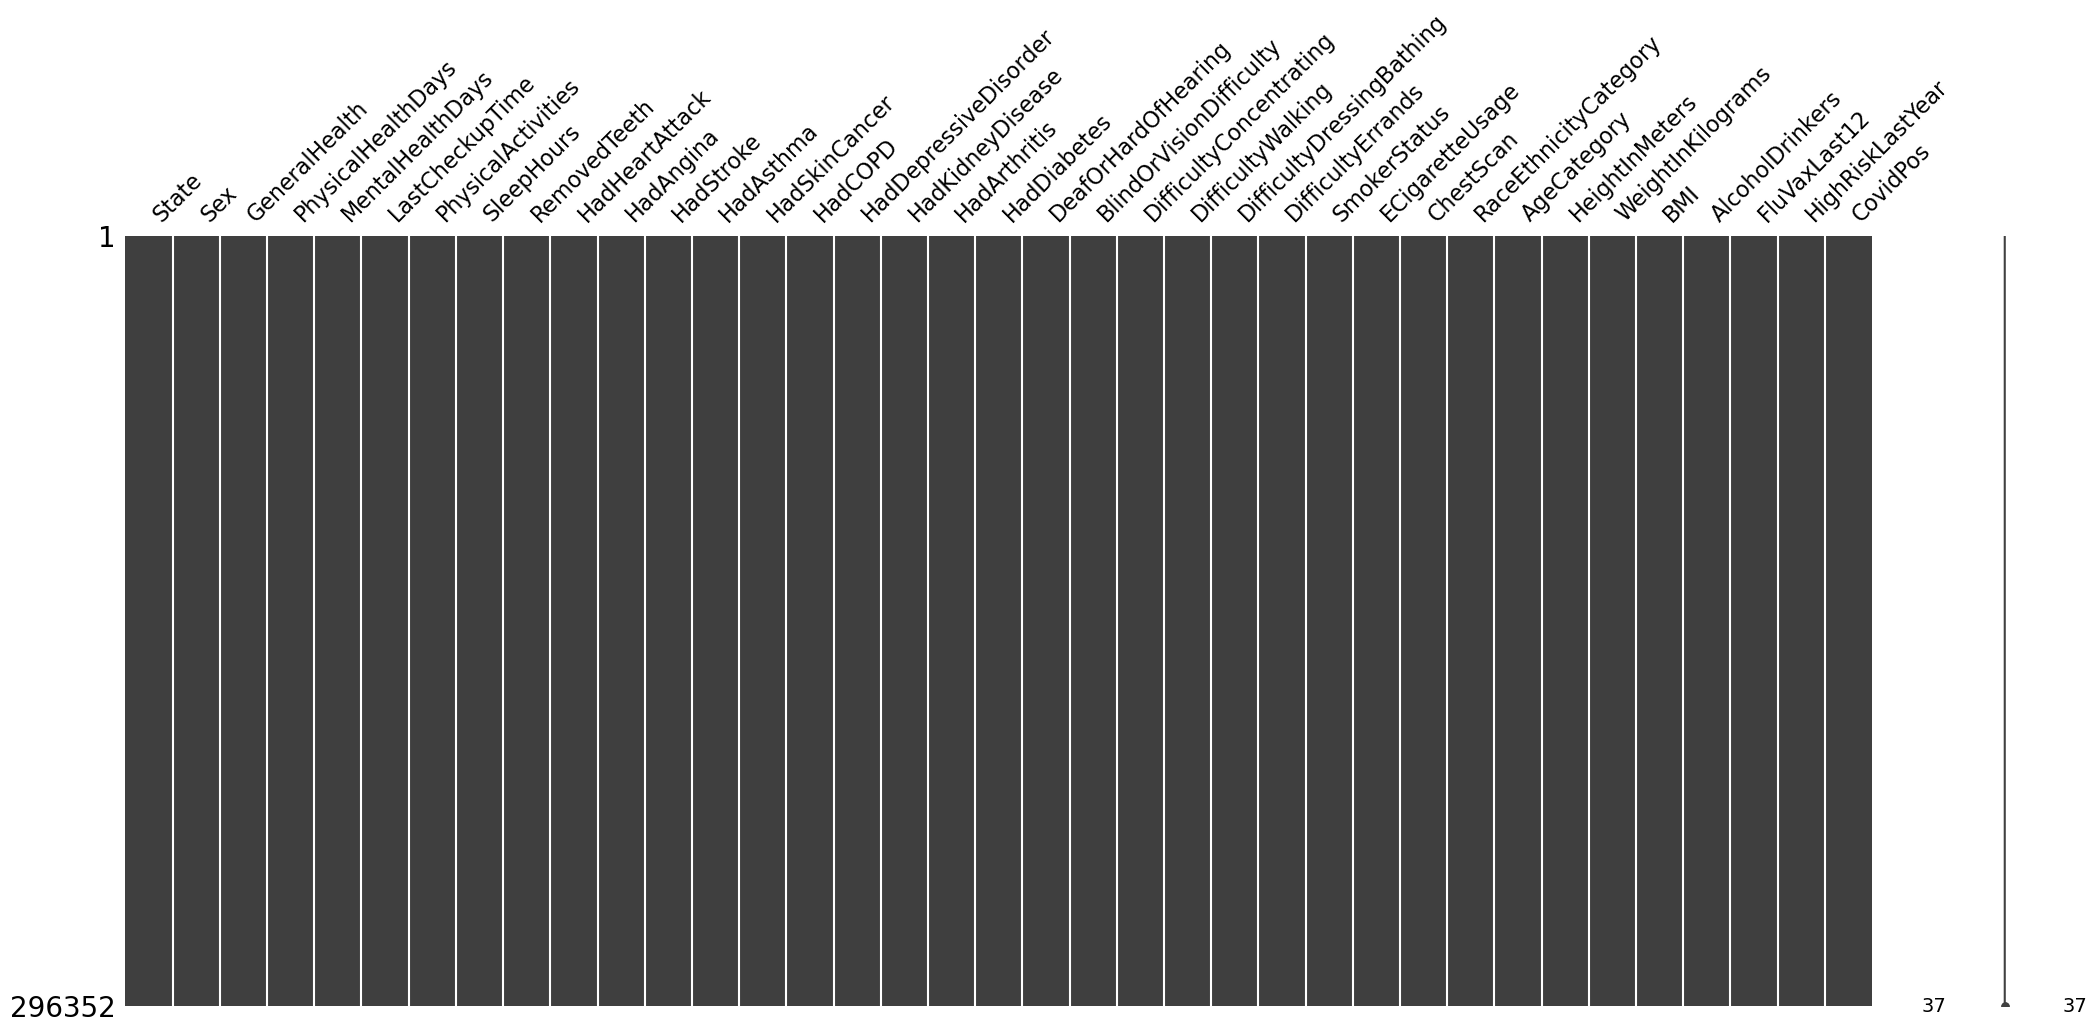

In [4]:
msno.matrix(data)
plt.show()

In [5]:
data1 = data.dropna()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296352 entries, 0 to 296351
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      296352 non-null  object 
 1   Sex                        296352 non-null  object 
 2   GeneralHealth              296352 non-null  object 
 3   PhysicalHealthDays         296352 non-null  float64
 4   MentalHealthDays           296352 non-null  float64
 5   LastCheckupTime            296352 non-null  object 
 6   PhysicalActivities         296352 non-null  object 
 7   SleepHours                 296352 non-null  float64
 8   RemovedTeeth               296352 non-null  object 
 9   HadHeartAttack             296352 non-null  object 
 10  HadAngina                  296352 non-null  object 
 11  HadStroke                  296352 non-null  object 
 12  HadAsthma                  296352 non-null  object 
 13  HadSkinCancer              29

## Thic cell finds the columns that have >= 50000 missing values, drops those columns, and drops all null values in dataframe and generates data2

In [6]:
columns_to_drop = [column for column in data.columns if data[column].isna().sum() >= 60000]
data2 = data.drop(columns = columns_to_drop)
data2 = data2.dropna()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296352 entries, 0 to 296351
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      296352 non-null  object 
 1   Sex                        296352 non-null  object 
 2   GeneralHealth              296352 non-null  object 
 3   PhysicalHealthDays         296352 non-null  float64
 4   MentalHealthDays           296352 non-null  float64
 5   LastCheckupTime            296352 non-null  object 
 6   PhysicalActivities         296352 non-null  object 
 7   SleepHours                 296352 non-null  float64
 8   RemovedTeeth               296352 non-null  object 
 9   HadHeartAttack             296352 non-null  object 
 10  HadAngina                  296352 non-null  object 
 11  HadStroke                  296352 non-null  object 
 12  HadAsthma                  296352 non-null  object 
 13  HadSkinCancer              29

## This cell finds the numerical and categorical columns and gets the count of each. change for data1/data2

In [7]:
num_cols1 = data1.select_dtypes(include=['number']).columns.tolist()
num_cols2 = data2.select_dtypes(include=['number']).columns.tolist()
cat_cols1 = data1.select_dtypes(include=['object']).columns.tolist()
cat_cols2 = data2.select_dtypes(include=['object']).columns.tolist()

print('There are [[', len(num_cols1), ']] numeric columns in data1 and [[', len(num_cols2), ']] numeric columns in data2')
print('There are [[', len(cat_cols1), ']] categorical columns in data1 and [[', len(cat_cols2), ']] categorical columns in data2\n')

There are [[ 6 ]] numeric columns in data1 and [[ 6 ]] numeric columns in data2
There are [[ 31 ]] categorical columns in data1 and [[ 31 ]] categorical columns in data2



## This cell checks number of null values in each dataframe, data1/data2

In [8]:
for i, column in enumerate(data.columns, start = 1):
    nan_count = data[column].isna().sum()
    nunique = data[column].nunique()
    print(i, '. Column [[', i, ']] has [[', nan_count, ']] null values and [[', nunique, ']] unique values.\n')

1 . Column [[ 1 ]] has [[ 0 ]] null values and [[ 54 ]] unique values.

2 . Column [[ 2 ]] has [[ 0 ]] null values and [[ 2 ]] unique values.

3 . Column [[ 3 ]] has [[ 0 ]] null values and [[ 5 ]] unique values.

4 . Column [[ 4 ]] has [[ 0 ]] null values and [[ 31 ]] unique values.

5 . Column [[ 5 ]] has [[ 0 ]] null values and [[ 31 ]] unique values.

6 . Column [[ 6 ]] has [[ 0 ]] null values and [[ 4 ]] unique values.

7 . Column [[ 7 ]] has [[ 0 ]] null values and [[ 2 ]] unique values.

8 . Column [[ 8 ]] has [[ 0 ]] null values and [[ 23 ]] unique values.

9 . Column [[ 9 ]] has [[ 0 ]] null values and [[ 4 ]] unique values.

10 . Column [[ 10 ]] has [[ 0 ]] null values and [[ 2 ]] unique values.

11 . Column [[ 11 ]] has [[ 0 ]] null values and [[ 2 ]] unique values.

12 . Column [[ 12 ]] has [[ 0 ]] null values and [[ 2 ]] unique values.

13 . Column [[ 13 ]] has [[ 0 ]] null values and [[ 2 ]] unique values.

14 . Column [[ 14 ]] has [[ 0 ]] null values and [[ 2 ]] unique v

## This cell generates pyramid plot sample for sex count vs. state

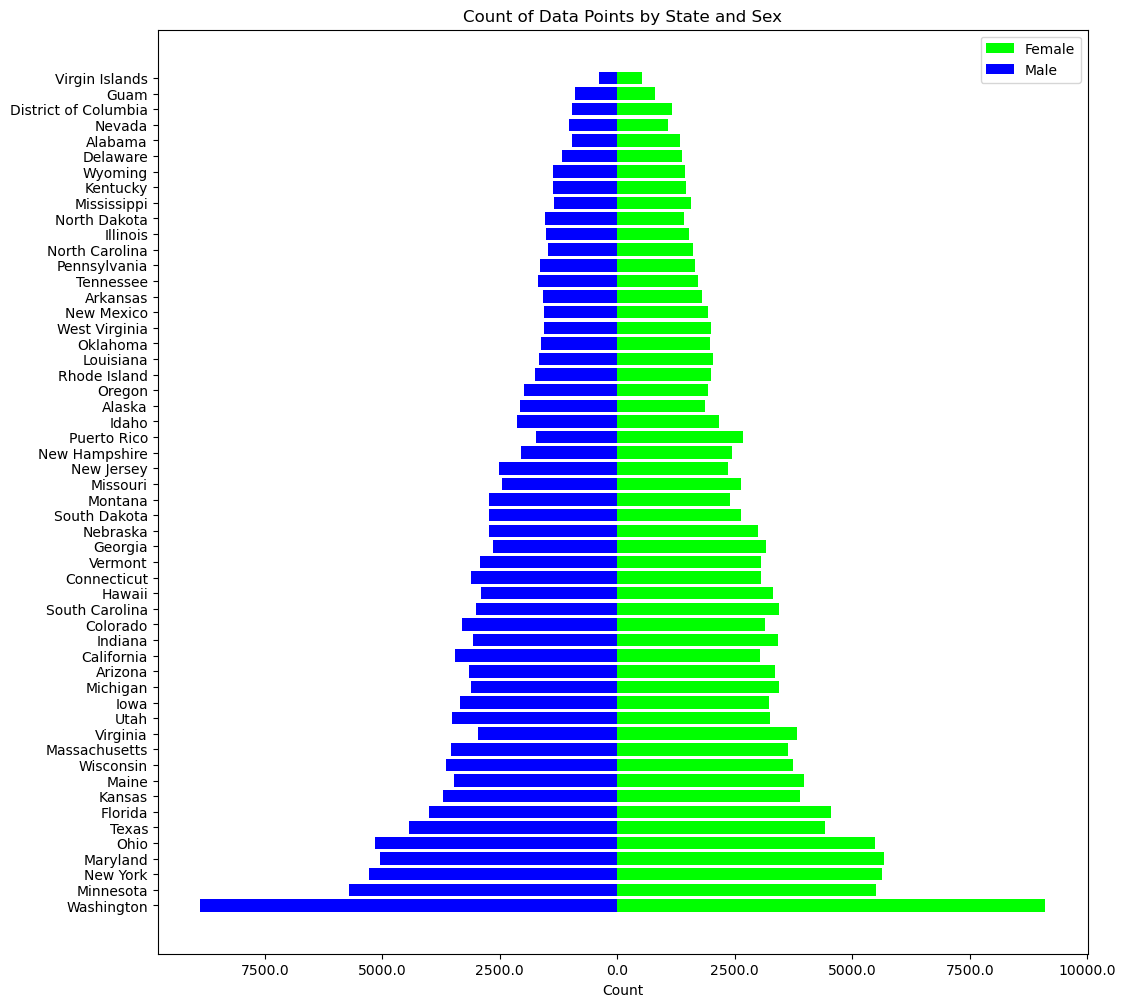

In [9]:
# Ensure 'Sex' column has consistent values
data['Sex'] = data['Sex'].str.capitalize()

# Pivot the data to get counts of males and females per state
state_sex_counts = data.pivot_table(index='State', columns='Sex', aggfunc='size', fill_value=0)

# Calculate total count for each state and sort
state_sex_counts['Total'] = state_sex_counts.sum(axis=1)
state_sex_counts = state_sex_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Define positions for states
y = range(len(state_sex_counts))

# Plot bars for Males and Females
ax.barh(y, state_sex_counts['Female'], color='lime', label='Female')
ax.barh(y, -state_sex_counts['Male'], color='blue', label='Male')

# Set labels and title
ax.set(yticks=y, yticklabels=state_sex_counts.index)
ax.set_xticklabels([abs(x) for x in ax.get_xticks()])

ax.set_xlabel('Count')
ax.set_title('Count of Data Points by State and Sex')
ax.legend()

# Add grid
ax.grid(False)

# Display the plot
plt.show()


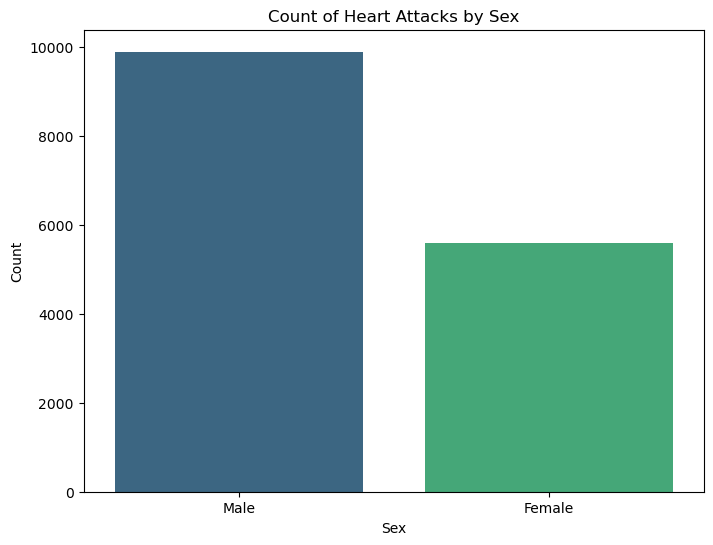

In [10]:
# Filter the data for people who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Group by 'Sex' and count the number of occurrences
heart_attack_count_by_sex = heart_attack_data['Sex'].value_counts().reset_index()
heart_attack_count_by_sex.columns = ['Sex', 'Count']

# Plot the data using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Count', data=heart_attack_count_by_sex, palette='viridis')

# Customizing the plot
plt.title('Count of Heart Attacks by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


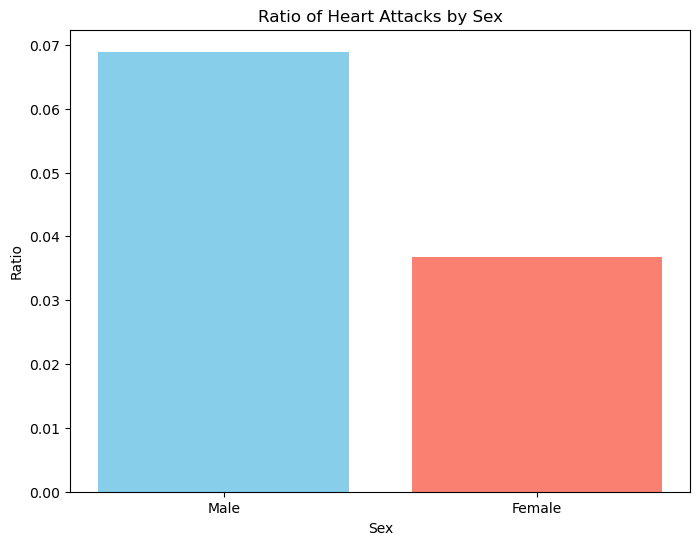

In [11]:
# Filter the data for people who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Group by 'Sex' and count the number of occurrences
heart_attack_count_by_sex = heart_attack_data['Sex'].value_counts().reset_index()
heart_attack_count_by_sex.columns = ['Sex', 'Count']

# Calculate the total count of men and women in the dataset
total_count_by_sex = data['Sex'].value_counts().reset_index()
total_count_by_sex.columns = ['Sex', 'Total Count']

# Merge the two DataFrames to calculate the ratios
heart_attack_count_by_sex = pd.merge(heart_attack_count_by_sex, total_count_by_sex, on='Sex')

# Calculate the ratios
heart_attack_count_by_sex['Ratio'] = heart_attack_count_by_sex['Count'] / heart_attack_count_by_sex['Total Count']

# Plot the ratios
plt.figure(figsize=(8, 6))
plt.bar(heart_attack_count_by_sex['Sex'], heart_attack_count_by_sex['Ratio'], color=['skyblue', 'salmon'])
plt.title('Ratio of Heart Attacks by Sex')
plt.xlabel('Sex')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.show()


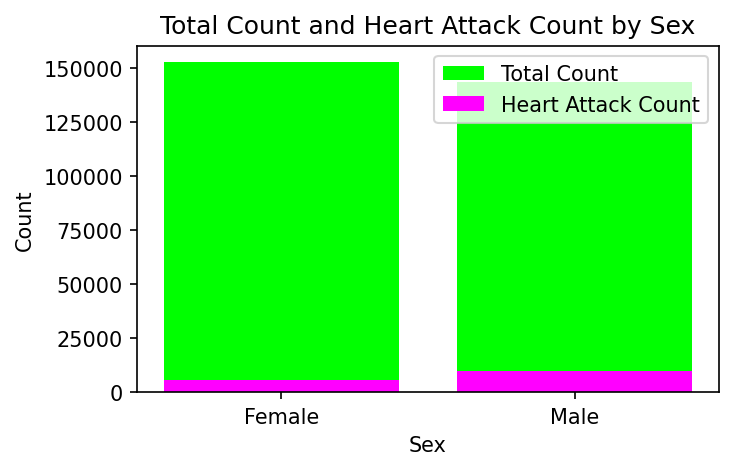

In [12]:
# Calculate the total count of males and females
total_count_by_sex = data['Sex'].value_counts().reset_index()
total_count_by_sex.columns = ['Sex', 'Total Count']

# Calculate the count of males and females who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']
heart_attack_count_by_sex = heart_attack_data['Sex'].value_counts().reset_index()
heart_attack_count_by_sex.columns = ['Sex', 'Heart Attack Count']

# Combine the counts into a single DataFrame
combined_counts = total_count_by_sex.merge(heart_attack_count_by_sex, on='Sex', how='left')
combined_counts['Heart Attack Count'].fillna(0, inplace=True)

# Add a column for the remaining count (those who did not have a heart attack)
combined_counts['No Heart Attack Count'] = combined_counts['Total Count'] - combined_counts['Heart Attack Count']

# Plot the stacked bar chart
plt.figure(figsize=(5, 3), dpi = 150)

# Plot the stacked bars
plt.bar(combined_counts['Sex'], combined_counts['Total Count'], color='lime', label='Total Count')
plt.bar(combined_counts['Sex'], combined_counts['Heart Attack Count'], color='fuchsia', label='Heart Attack Count')

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Total Count and Heart Attack Count by Sex')
plt.legend()

# Show the plot
plt.show()


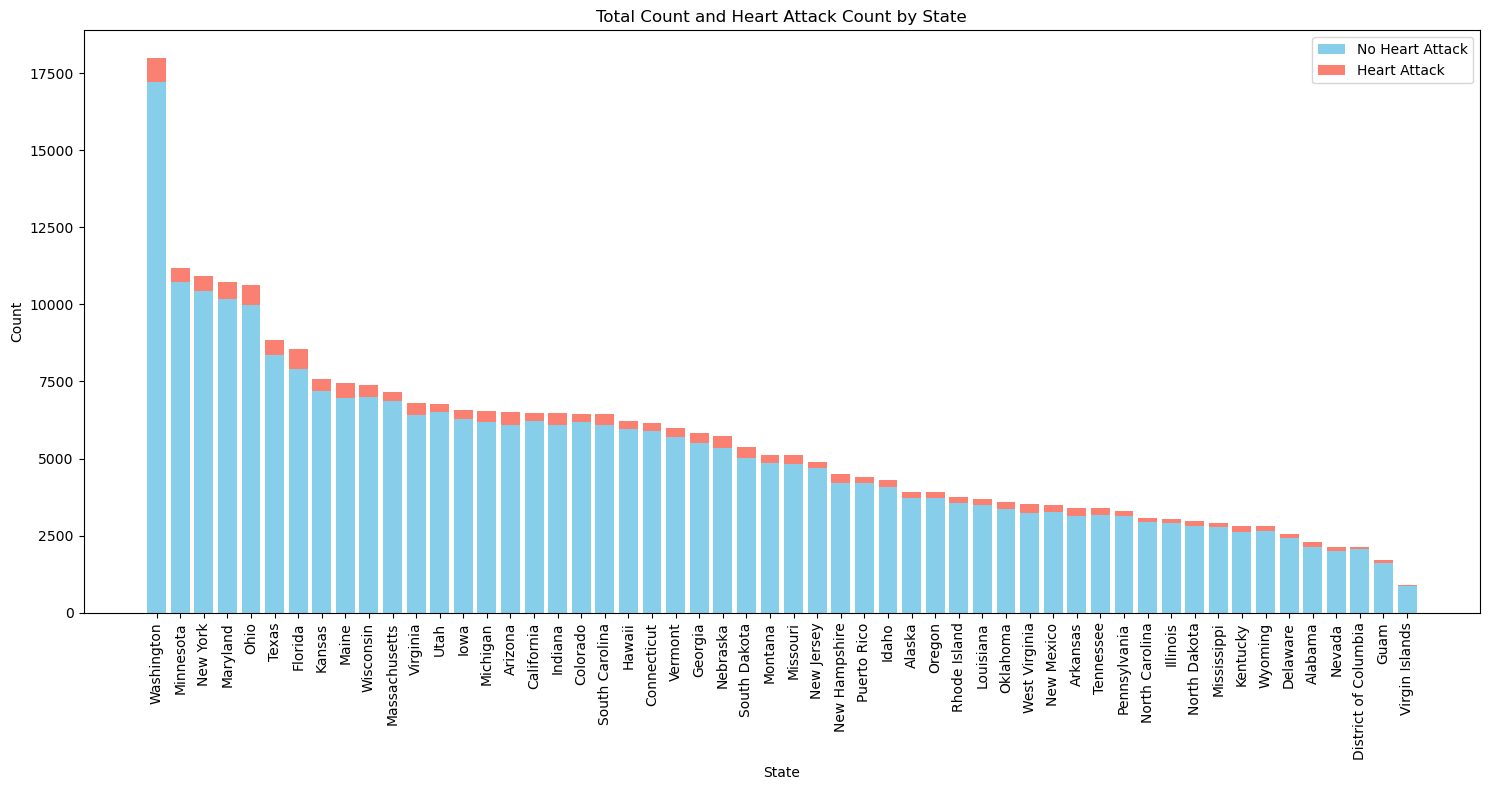

In [13]:
# Calculate the total count of individuals by state
total_count_by_state = data['State'].value_counts().reset_index()
total_count_by_state.columns = ['State', 'Total Count']

# Calculate the count of individuals who had a heart attack by state
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']
heart_attack_count_by_state = heart_attack_data['State'].value_counts().reset_index()
heart_attack_count_by_state.columns = ['State', 'Heart Attack Count']

# Combine the counts into a single DataFrame
combined_counts = total_count_by_state.merge(heart_attack_count_by_state, on='State', how='left')
combined_counts['Heart Attack Count'].fillna(0, inplace=True)

# Add a column for the remaining count (those who did not have a heart attack)
combined_counts['No Heart Attack Count'] = combined_counts['Total Count'] - combined_counts['Heart Attack Count']

# Plot the stacked bar chart
plt.figure(figsize=(15, 8))

# Plot the stacked bars
plt.bar(combined_counts['State'], combined_counts['No Heart Attack Count'], color='skyblue', label='No Heart Attack')
plt.bar(combined_counts['State'], combined_counts['Heart Attack Count'], bottom=combined_counts['No Heart Attack Count'], color='salmon', label='Heart Attack')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Total Count and Heart Attack Count by State')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  
plt.show()


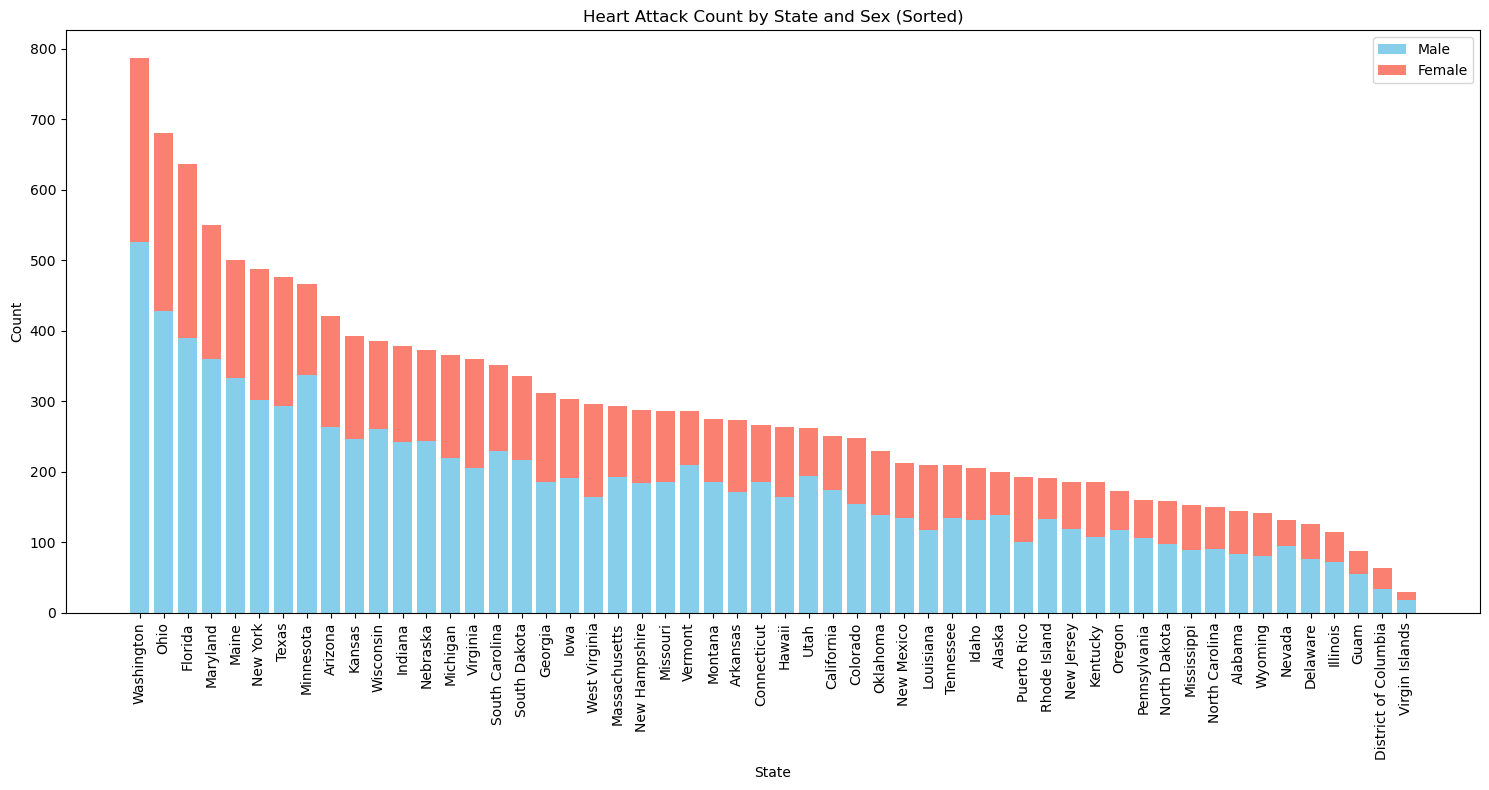

In [14]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by state and sex
heart_attack_count_by_state_sex = heart_attack_data.groupby(['State', 'Sex']).size().unstack(fill_value=0)

# Calculate the total count of heart attack cases by state and sort in descending order
total_heart_attack_count_by_state = heart_attack_count_by_state_sex.sum(axis=1).sort_values(ascending=False)

# Sort the heart attack count data based on the total counts
sorted_heart_attack_count_by_state_sex = heart_attack_count_by_state_sex.loc[total_heart_attack_count_by_state.index]

# Ensure the DataFrame has columns for both 'Male' and 'Female' to avoid issues in plotting
if 'Male' not in sorted_heart_attack_count_by_state_sex.columns:
    sorted_heart_attack_count_by_state_sex['Male'] = 0
if 'Female' not in sorted_heart_attack_count_by_state_sex.columns:
    sorted_heart_attack_count_by_state_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(15, 8))

# Plot the stacked bars
plt.bar(sorted_heart_attack_count_by_state_sex.index, sorted_heart_attack_count_by_state_sex['Male'], color='skyblue', label='Male')
plt.bar(sorted_heart_attack_count_by_state_sex.index, sorted_heart_attack_count_by_state_sex['Female'], bottom=sorted_heart_attack_count_by_state_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Heart Attack Count by State and Sex (Sorted)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  
plt.show()


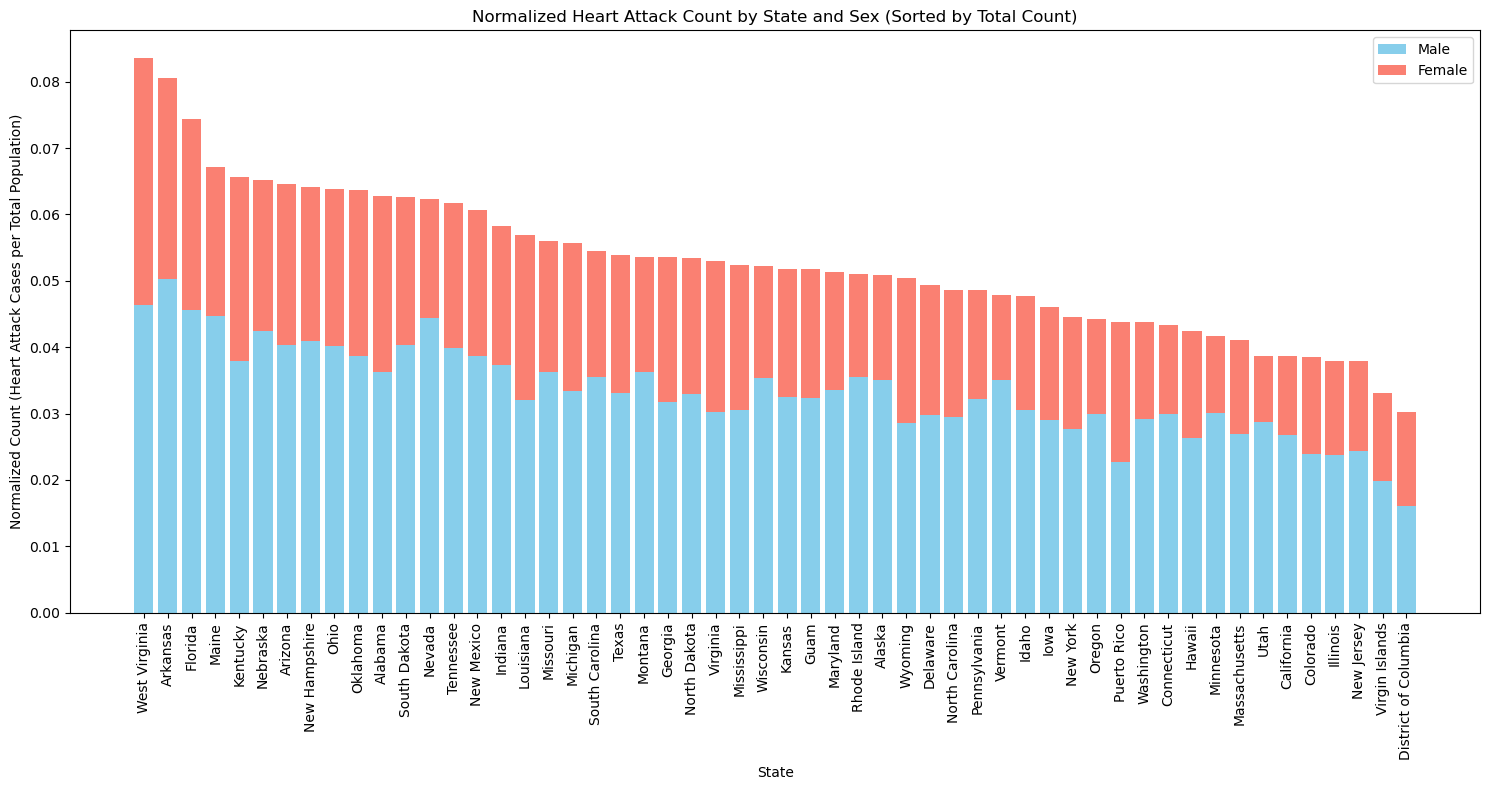

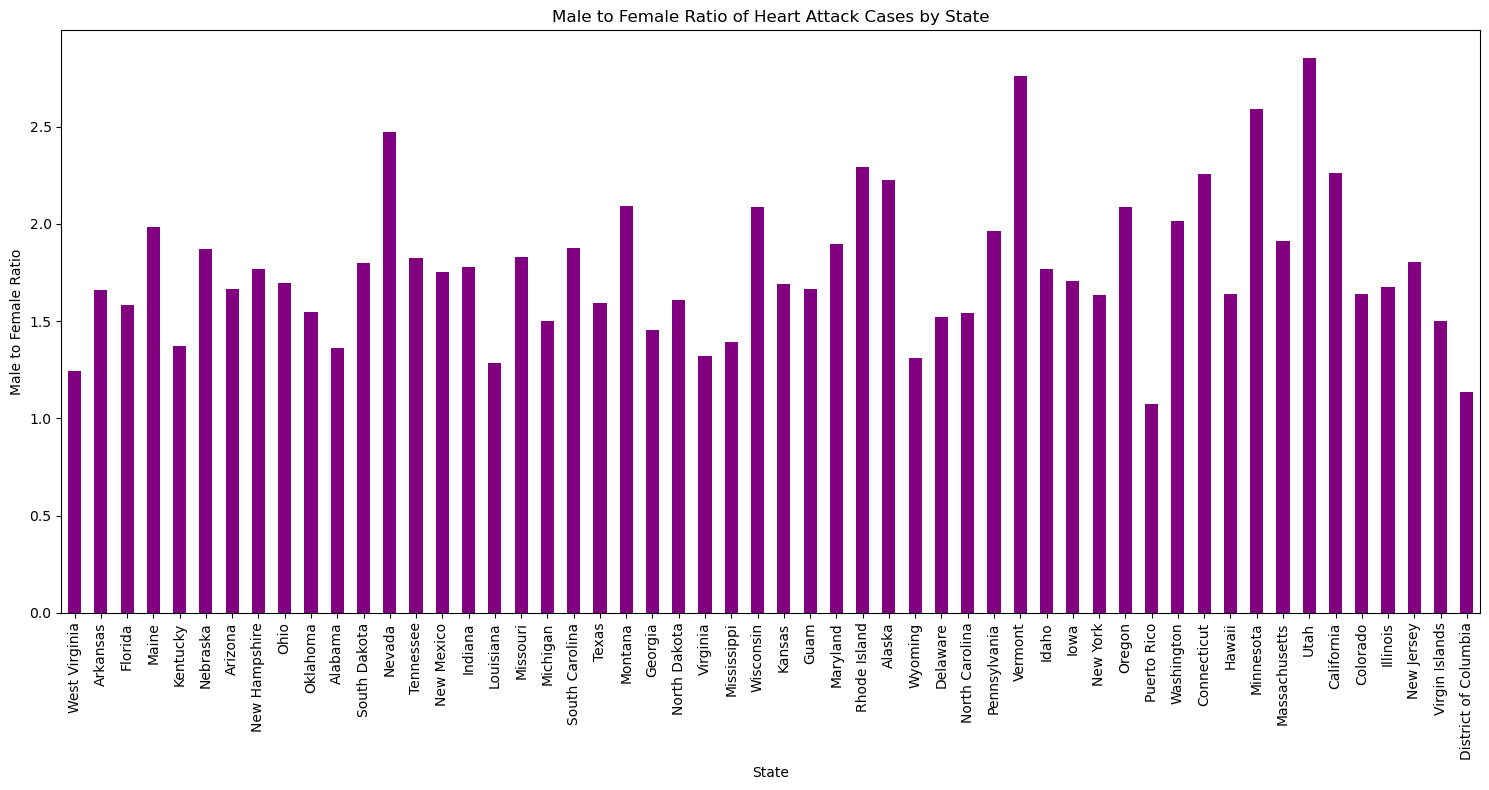

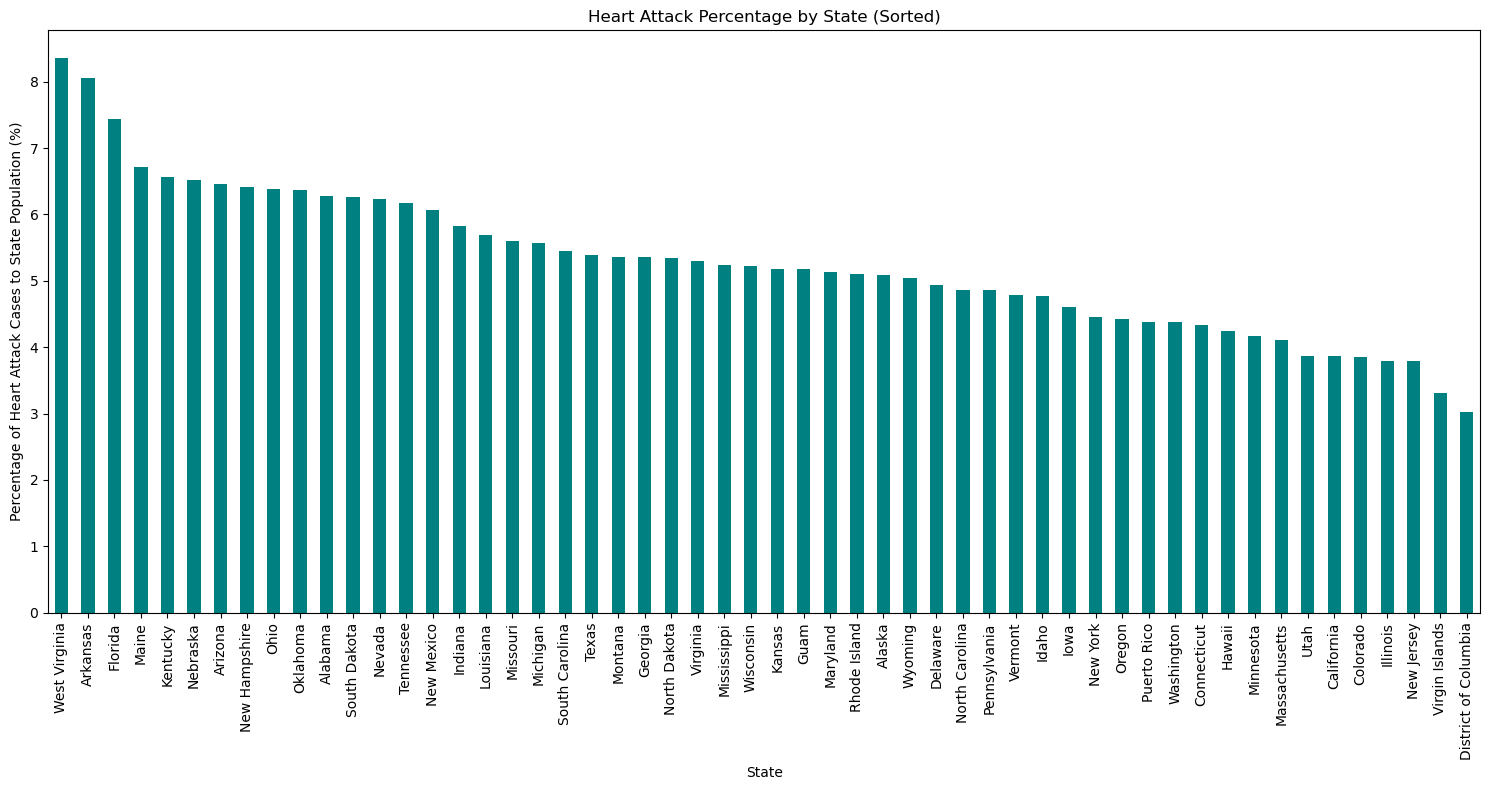

In [15]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by state and sex
heart_attack_count_by_state_sex = heart_attack_data.groupby(['State', 'Sex']).size().unstack(fill_value=0)

# Calculate the total number of people by state in the original dataset (not just those with heart attacks)
total_population_by_state = data.groupby('State').size()

# Normalize the heart attack counts by the total population of each state
normalized_heart_attack_count_by_state_sex = heart_attack_count_by_state_sex.div(total_population_by_state, axis=0)

# Calculate the total normalized heart attack count by state
total_normalized_heart_attack_by_state = normalized_heart_attack_count_by_state_sex.sum(axis=1)

# Sort the states based on the total normalized heart attack count
sorted_normalized_heart_attack_count_by_state_sex = normalized_heart_attack_count_by_state_sex.loc[total_normalized_heart_attack_by_state.sort_values(ascending=False).index]

# Plot the normalized stacked bar chart
plt.figure(figsize=(15, 8))

# Plot the stacked bars
plt.bar(sorted_normalized_heart_attack_count_by_state_sex.index, sorted_normalized_heart_attack_count_by_state_sex['Male'], color='skyblue', label='Male')
plt.bar(sorted_normalized_heart_attack_count_by_state_sex.index, sorted_normalized_heart_attack_count_by_state_sex['Female'], bottom=sorted_normalized_heart_attack_count_by_state_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Normalized Count (Heart Attack Cases per Total Population)')
plt.title('Normalized Heart Attack Count by State and Sex (Sorted by Total Count)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  
plt.show()

# Calculate the male-to-female ratio for each state
ratio_male_female = sorted_normalized_heart_attack_count_by_state_sex['Male'] / sorted_normalized_heart_attack_count_by_state_sex['Female']

# Step 9: Plot the male-to-female ratio
plt.figure(figsize=(15, 8))
ratio_male_female.plot(kind='bar', color='purple')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Male to Female Ratio')
plt.title('Male to Female Ratio of Heart Attack Cases by State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  
plt.show()

# Calculate the percentage of heart attack cases relative to the state population
heart_attack_percentage_by_state = (heart_attack_count_by_state_sex.sum(axis=1) / total_population_by_state) * 100

# Sort the states by the percentage of heart attack cases
sorted_heart_attack_percentage_by_state = heart_attack_percentage_by_state.sort_values(ascending=False)

# Plot the heart attack percentage by state
plt.figure(figsize=(15, 8))

# Plot the bar chart
sorted_heart_attack_percentage_by_state.plot(kind='bar', color='teal')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Percentage of Heart Attack Cases to State Population (%)')
plt.title('Heart Attack Percentage by State (Sorted)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


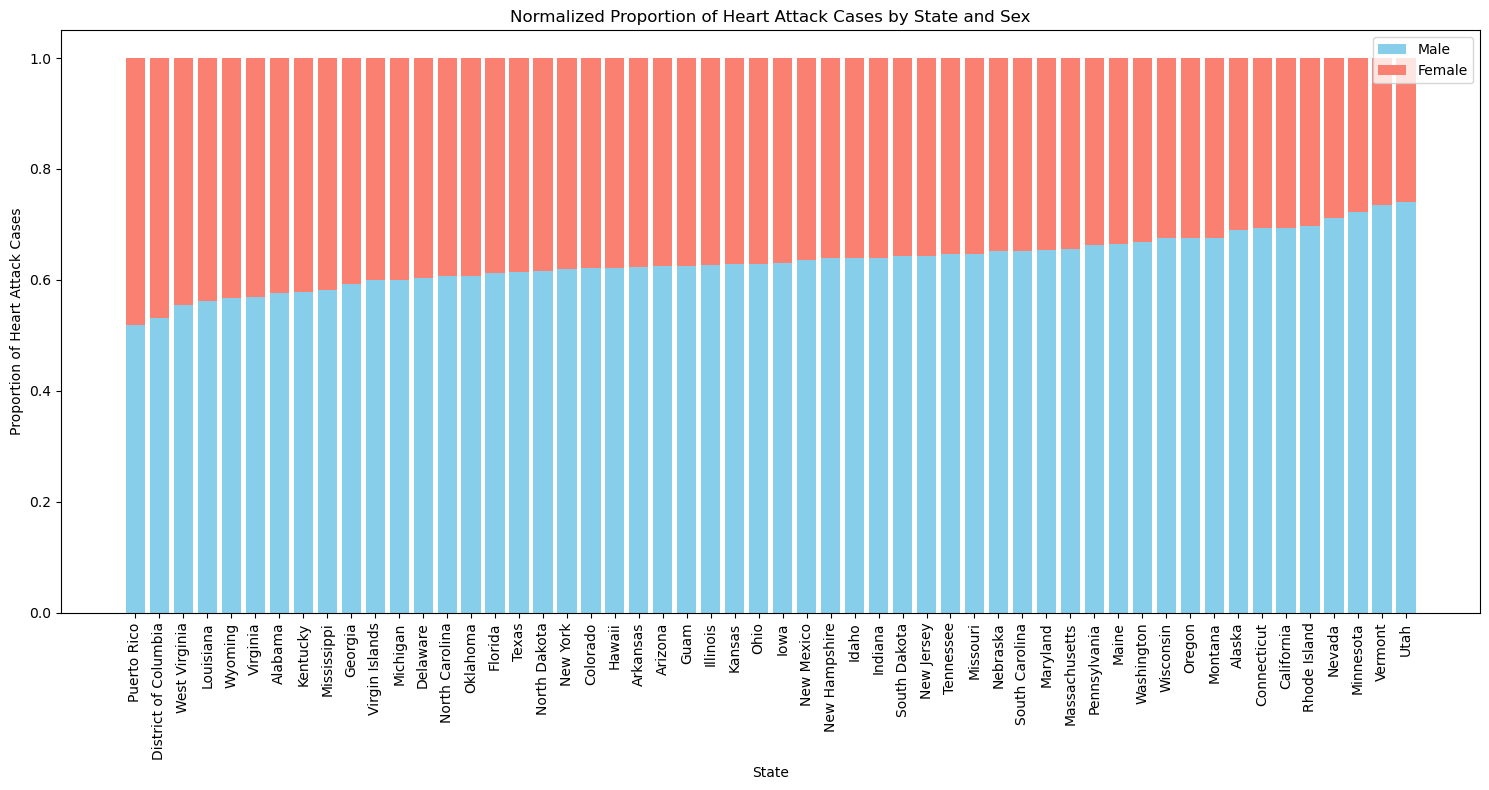

In [16]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by state and sex
heart_attack_count_by_state_sex = heart_attack_data.groupby(['State', 'Sex']).size().unstack(fill_value=0)

# Normalize the heart attack counts by the total number of heart attack cases in each state
normalized_heart_attack_count_by_state_sex = heart_attack_count_by_state_sex.div(heart_attack_count_by_state_sex.sum(axis=1), axis=0)

# Sort the normalized data by the proportion of females who had heart attacks, in descending order
sorted_normalized_heart_attack_count_by_state_sex = normalized_heart_attack_count_by_state_sex.sort_values(by='Female', ascending=False)

# Ensure the DataFrame has columns for both 'Male' and 'Female' to avoid issues in plotting
if 'Male' not in sorted_normalized_heart_attack_count_by_state_sex.columns:
    sorted_normalized_heart_attack_count_by_state_sex['Male'] = 0
if 'Female' not in sorted_normalized_heart_attack_count_by_state_sex.columns:
    sorted_normalized_heart_attack_count_by_state_sex['Female'] = 0

# Plot the normalized stacked bar chart
plt.figure(figsize=(15, 8))

# Plot the stacked bars
plt.bar(sorted_normalized_heart_attack_count_by_state_sex.index, sorted_normalized_heart_attack_count_by_state_sex['Male'], color='skyblue', label='Male')
plt.bar(sorted_normalized_heart_attack_count_by_state_sex.index, sorted_normalized_heart_attack_count_by_state_sex['Female'], bottom=sorted_normalized_heart_attack_count_by_state_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Proportion of Heart Attack Cases')
plt.title('Normalized Proportion of Heart Attack Cases by State and Sex')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  
plt.show()


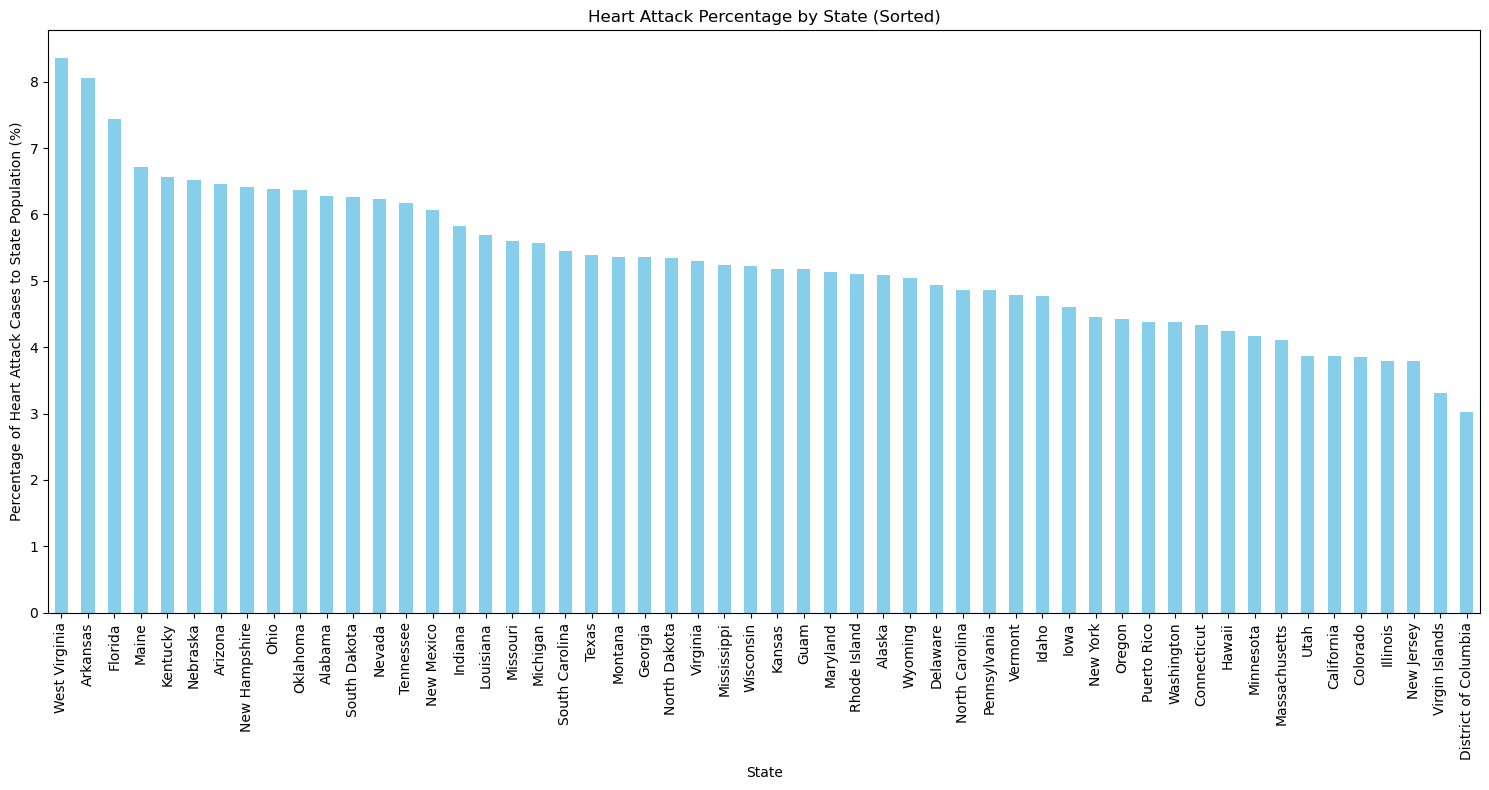

In [17]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by state and sex
heart_attack_count_by_state_sex = heart_attack_data.groupby(['State', 'Sex']).size().unstack(fill_value=0)

# Calculate the total number of heart attack cases by state
total_heart_attack_count_by_state = heart_attack_count_by_state_sex.sum(axis=1)

# Calculate the total population by state
total_population_by_state = data.groupby('State').size()

# Calculate the percentage of heart attack cases to the population for each state
heart_attack_percentage_by_state = (total_heart_attack_count_by_state / total_population_by_state) * 100

# Sort the percentages in descending order
heart_attack_percentage_by_state_sorted = heart_attack_percentage_by_state.sort_values(ascending=False)

# Plot the sorted percentages
plt.figure(figsize=(15, 8))

# Plot the bar chart
heart_attack_percentage_by_state_sorted.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Percentage of Heart Attack Cases to State Population (%)')
plt.title('Heart Attack Percentage by State (Sorted)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


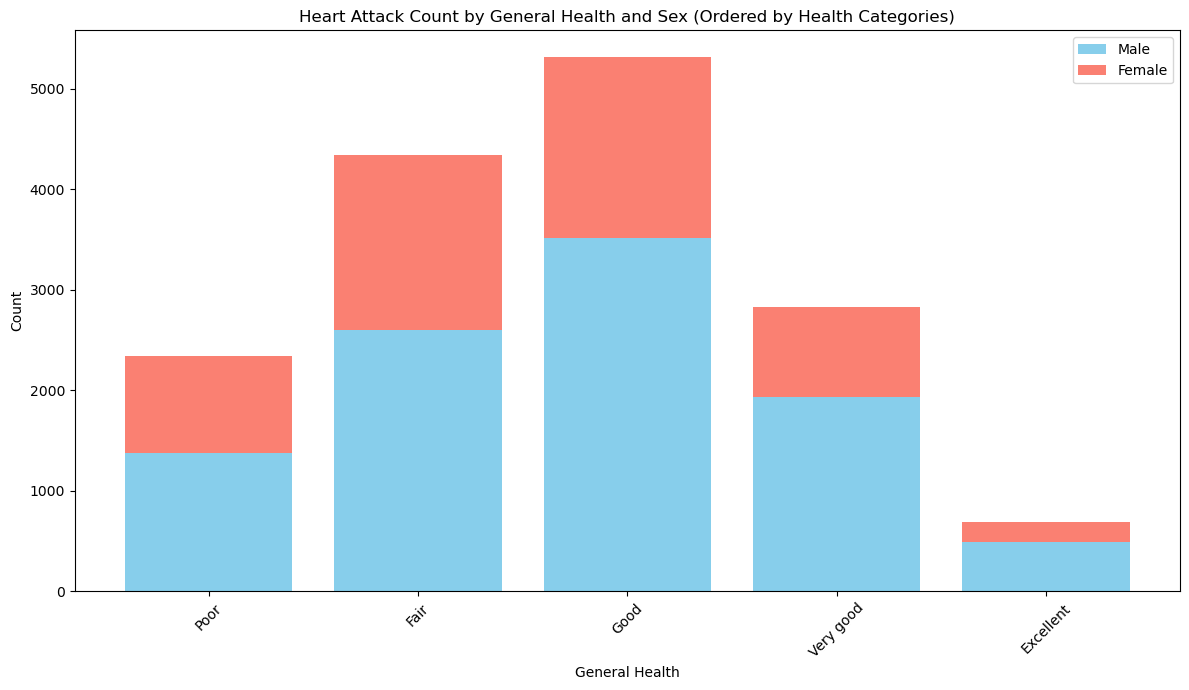

In [18]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Define the desired order of the GeneralHealth categories
desired_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

# Convert 'GeneralHealth' to a categorical type with the specified order
heart_attack_data['GeneralHealth'] = pd.Categorical(
    heart_attack_data['GeneralHealth'],
    categories=desired_order,
    ordered=True
)

# Calculate the count of individuals who had a heart attack by GeneralHealth and sex
heart_attack_count_by_health_sex = heart_attack_data.groupby(['GeneralHealth', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_health_sex.columns:
    heart_attack_count_by_health_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_health_sex.columns:
    heart_attack_count_by_health_sex['Female'] = 0

# Sort by the specified order of GeneralHealth
sorted_heart_attack_count_by_health_sex = heart_attack_count_by_health_sex.loc[desired_order]

# Plot the stacked bar chart
plt.figure(figsize=(12, 7))

# Plot the stacked bars
plt.bar(sorted_heart_attack_count_by_health_sex.index, sorted_heart_attack_count_by_health_sex['Male'], color='skyblue', label='Male')
plt.bar(sorted_heart_attack_count_by_health_sex.index, sorted_heart_attack_count_by_health_sex['Female'], bottom=sorted_heart_attack_count_by_health_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('General Health')
plt.ylabel('Count')
plt.title('Heart Attack Count by General Health and Sex (Ordered by Health Categories)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  
plt.show()


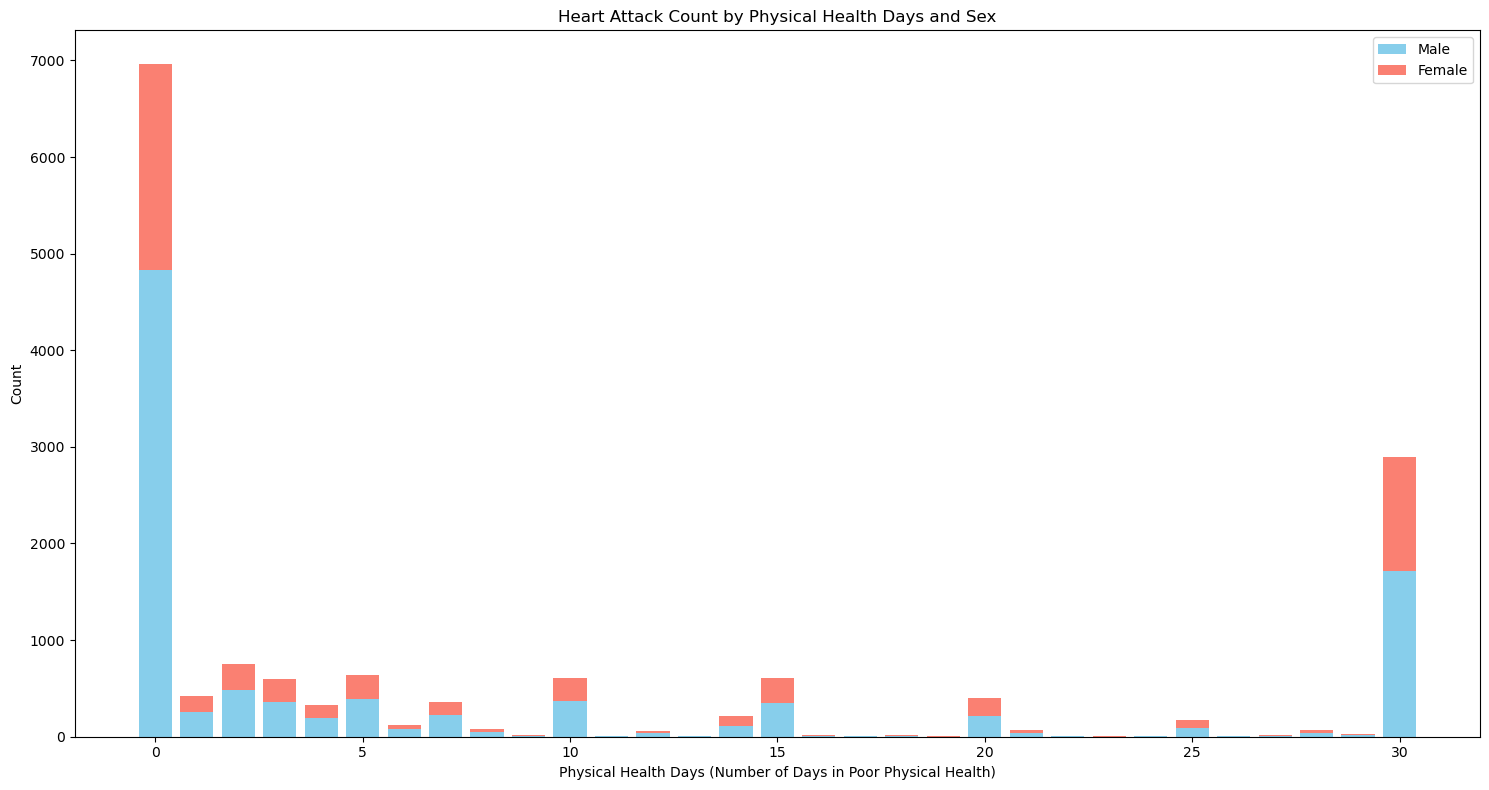

In [19]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Group the data by PhysicalHealthDays and Sex
heart_attack_count_by_physical_health_sex = heart_attack_data.groupby(['PhysicalHealthDays', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_physical_health_sex.columns:
    heart_attack_count_by_physical_health_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_physical_health_sex.columns:
    heart_attack_count_by_physical_health_sex['Female'] = 0

# Sort by PhysicalHealthDays (which should be numerical)
sorted_heart_attack_count_by_physical_health_sex = heart_attack_count_by_physical_health_sex.sort_index()

# Plot the stacked bar chart
plt.figure(figsize=(15, 8))

# Plot the stacked bars
plt.bar(sorted_heart_attack_count_by_physical_health_sex.index, sorted_heart_attack_count_by_physical_health_sex['Male'], color='skyblue', label='Male')
plt.bar(sorted_heart_attack_count_by_physical_health_sex.index, sorted_heart_attack_count_by_physical_health_sex['Female'], bottom=sorted_heart_attack_count_by_physical_health_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Physical Health Days (Number of Days in Poor Physical Health)')
plt.ylabel('Count')
plt.title('Heart Attack Count by Physical Health Days and Sex')
plt.legend()

# Show the plot
plt.tight_layout()  
plt.show()


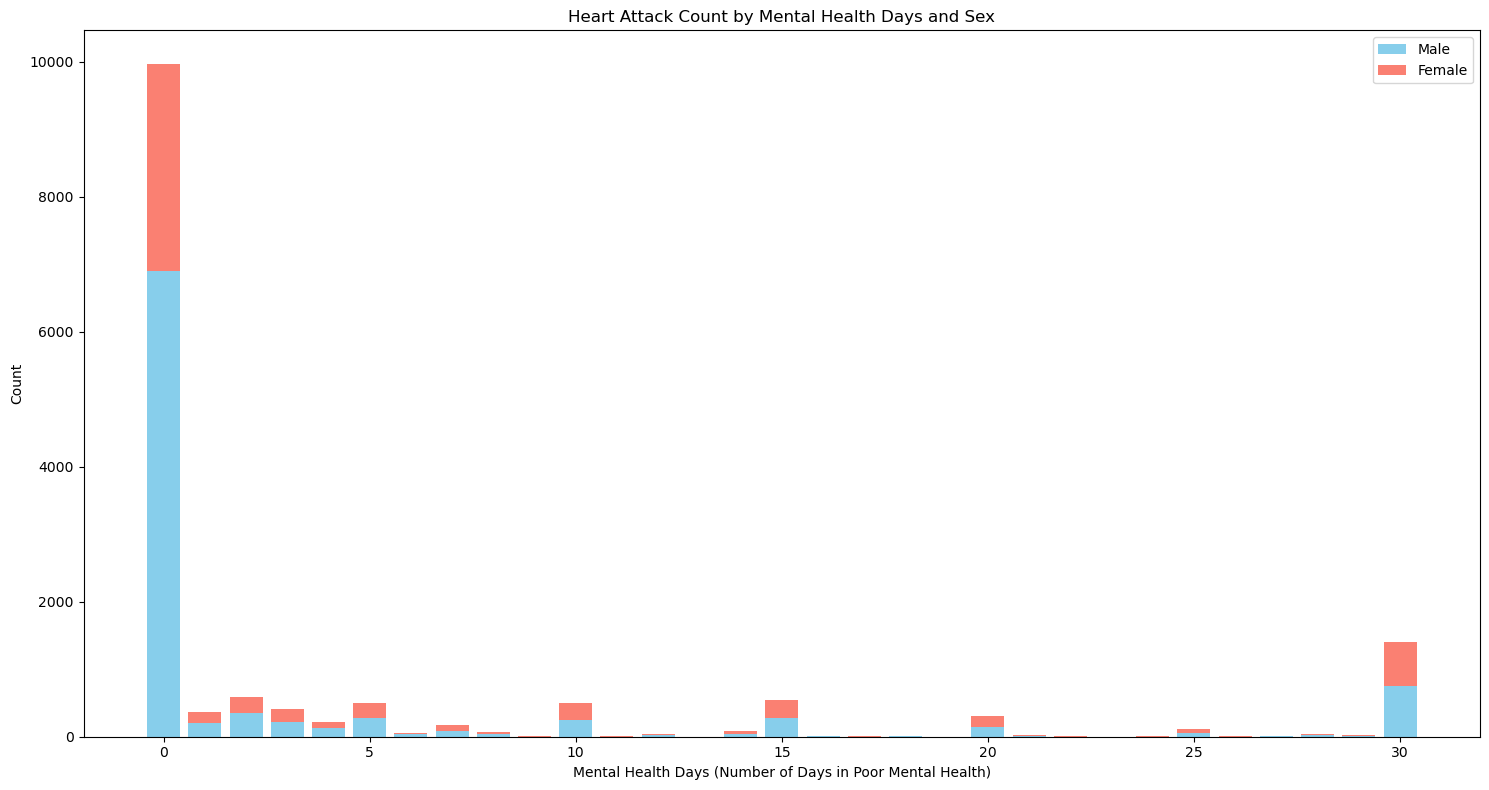

In [20]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Group the data by MentalHealthDays and Sex
heart_attack_count_by_mental_health_sex = heart_attack_data.groupby(['MentalHealthDays', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_mental_health_sex.columns:
    heart_attack_count_by_mental_health_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_mental_health_sex.columns:
    heart_attack_count_by_mental_health_sex['Female'] = 0

# Sort by MentalHealthDays (which should be numerical)
sorted_heart_attack_count_by_mental_health_sex = heart_attack_count_by_mental_health_sex.sort_index()

# Plot the stacked bar chart
plt.figure(figsize=(15, 8))

# Plot the stacked bars
plt.bar(sorted_heart_attack_count_by_mental_health_sex.index, sorted_heart_attack_count_by_mental_health_sex['Male'], color='skyblue', label='Male')
plt.bar(sorted_heart_attack_count_by_mental_health_sex.index, sorted_heart_attack_count_by_mental_health_sex['Female'], bottom=sorted_heart_attack_count_by_mental_health_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Mental Health Days (Number of Days in Poor Mental Health)')
plt.ylabel('Count')
plt.title('Heart Attack Count by Mental Health Days and Sex')
plt.legend()

# Show the plot
plt.tight_layout()  
plt.show()


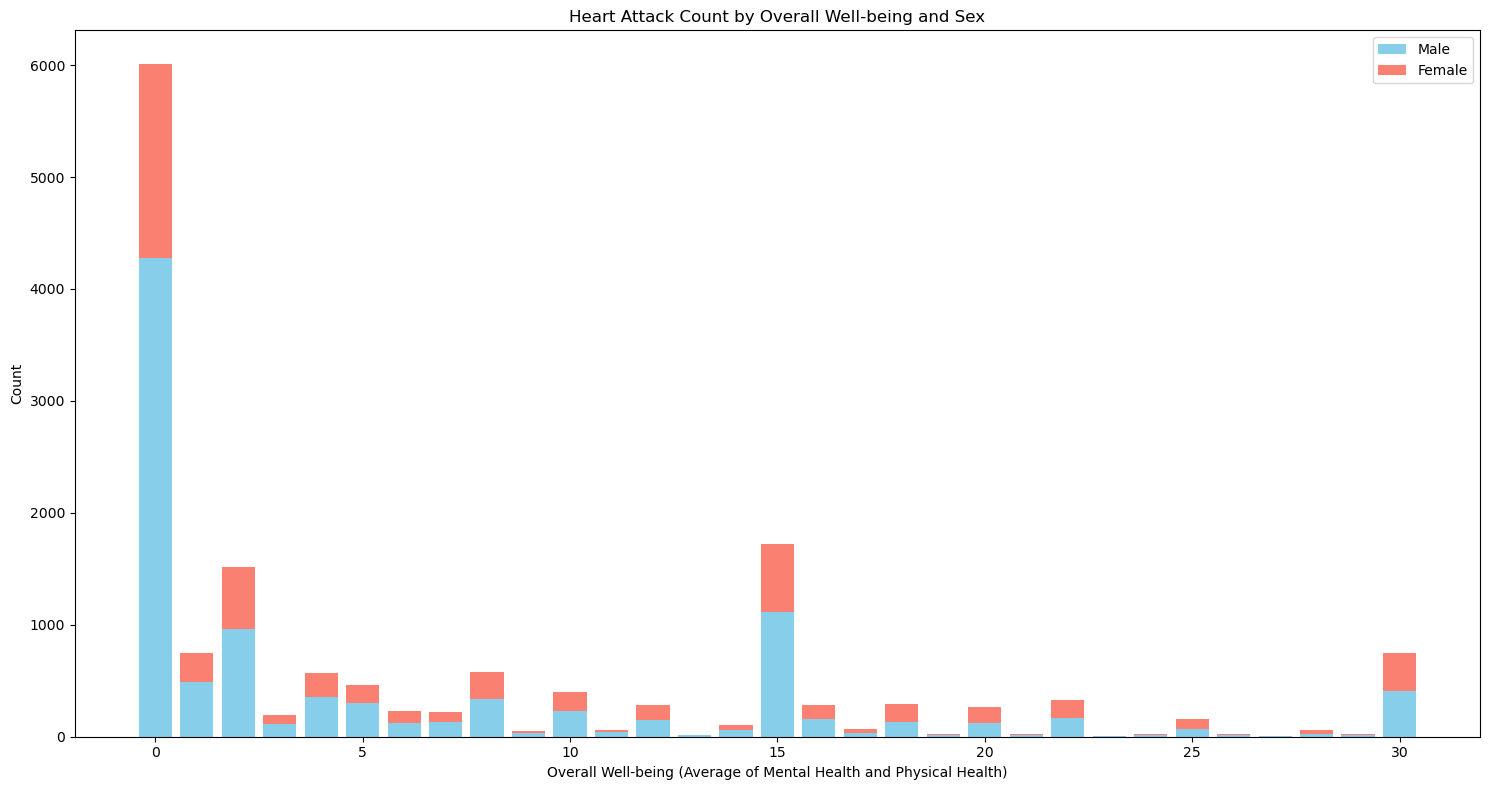

In [21]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the overall well-being by averaging MentalHealthDays and PhysicalHealthDays
heart_attack_data['OverallWellBeing'] = ((heart_attack_data['MentalHealthDays'] + heart_attack_data['PhysicalHealthDays']) / 2).round()

# Group the data by OverallWellBeing and Sex
heart_attack_count_by_wellbeing_sex = heart_attack_data.groupby(['OverallWellBeing', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_wellbeing_sex.columns:
    heart_attack_count_by_wellbeing_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_wellbeing_sex.columns:
    heart_attack_count_by_wellbeing_sex['Female'] = 0

# Sort by OverallWellBeing
sorted_heart_attack_count_by_wellbeing_sex = heart_attack_count_by_wellbeing_sex.sort_index()

# Plot the stacked bar chart
plt.figure(figsize=(15, 8))

# Plot the stacked bars
plt.bar(sorted_heart_attack_count_by_wellbeing_sex.index, sorted_heart_attack_count_by_wellbeing_sex['Male'], color='skyblue', label='Male')
plt.bar(sorted_heart_attack_count_by_wellbeing_sex.index, sorted_heart_attack_count_by_wellbeing_sex['Female'], bottom=sorted_heart_attack_count_by_wellbeing_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Overall Well-being (Average of Mental Health and Physical Health)')
plt.ylabel('Count')
plt.title('Heart Attack Count by Overall Well-being and Sex')
plt.legend()

# Show the plot
plt.tight_layout()  
plt.show()


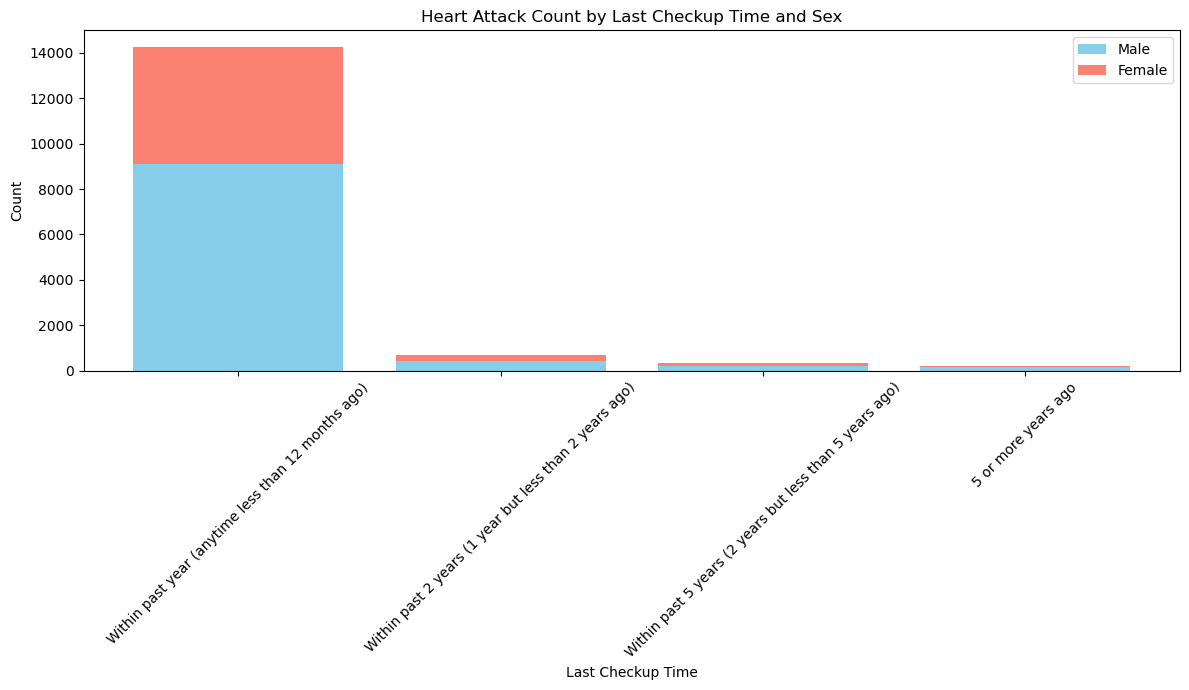

In [22]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Define the desired order of the LastCheckupTime categories
desired_order = [
    'Within past year (anytime less than 12 months ago)',
    'Within past 2 years (1 year but less than 2 years ago)',
    'Within past 5 years (2 years but less than 5 years ago)',
    '5 or more years ago'
]

# Convert 'LastCheckupTime' to a categorical type with the specified order
heart_attack_data['LastCheckupTime'] = pd.Categorical(
    heart_attack_data['LastCheckupTime'],
    categories=desired_order,
    ordered=True
)

# Calculate the count of individuals who had a heart attack by LastCheckupTime and sex
heart_attack_count_by_checkup_time_sex = heart_attack_data.groupby(['LastCheckupTime', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_checkup_time_sex.columns:
    heart_attack_count_by_checkup_time_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_checkup_time_sex.columns:
    heart_attack_count_by_checkup_time_sex['Female'] = 0

# Reorder the DataFrame according to the desired order of 'LastCheckupTime'
sorted_heart_attack_count_by_checkup_time_sex = heart_attack_count_by_checkup_time_sex.reindex(desired_order)

# Plot the stacked bar chart
plt.figure(figsize=(12, 7))

# Plot the stacked bars
plt.bar(sorted_heart_attack_count_by_checkup_time_sex.index, sorted_heart_attack_count_by_checkup_time_sex['Male'], color='skyblue', label='Male')
plt.bar(sorted_heart_attack_count_by_checkup_time_sex.index, sorted_heart_attack_count_by_checkup_time_sex['Female'], bottom=sorted_heart_attack_count_by_checkup_time_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Last Checkup Time')
plt.ylabel('Count')
plt.title('Heart Attack Count by Last Checkup Time and Sex')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  
plt.show()


PhysicalActivities
Yes    9832
No     5676
Name: count, dtype: int64


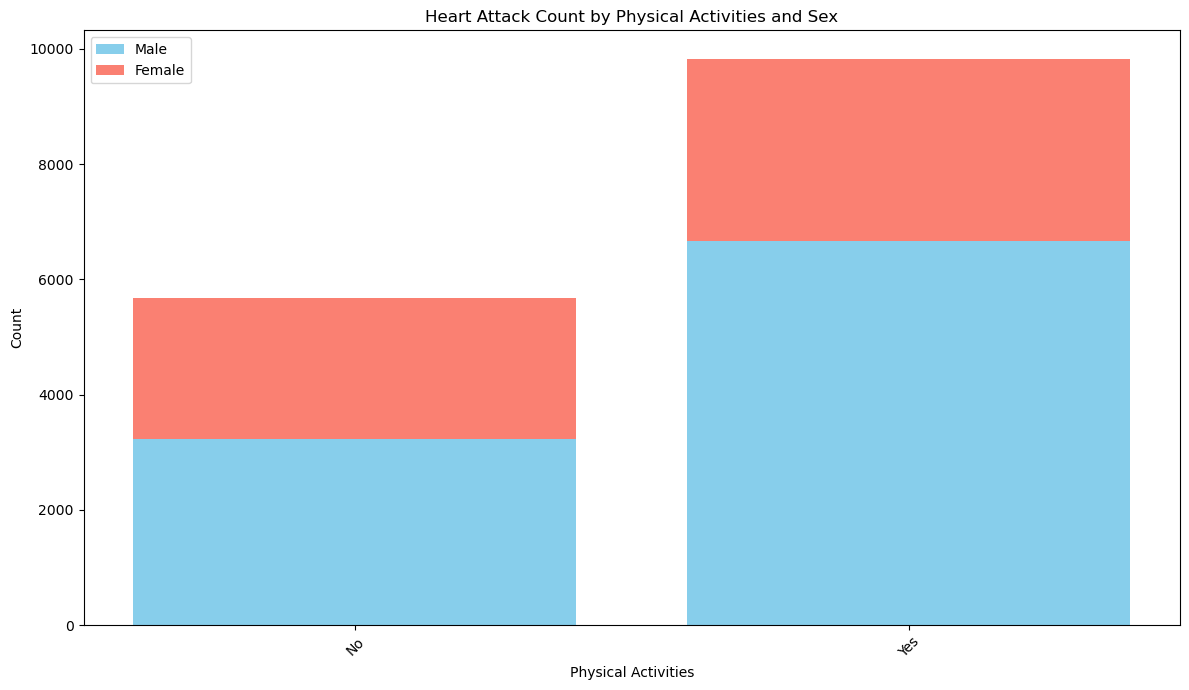

In [23]:
#Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Review unique values in the PhysicalActivities column
print(heart_attack_data['PhysicalActivities'].value_counts())

# Calculate the count of individuals who had a heart attack by PhysicalActivities and sex
heart_attack_count_by_activity_sex = heart_attack_data.groupby(['PhysicalActivities', 'Sex']).size().unstack(fill_value=0)

# Ensure the DataFrame has columns for both 'Male' and 'Female' to avoid issues in plotting
if 'Male' not in heart_attack_count_by_activity_sex.columns:
    heart_attack_count_by_activity_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_activity_sex.columns:
    heart_attack_count_by_activity_sex['Female'] = 0
sorted_heart_attack_count_by_activity_sex = heart_attack_count_by_activity_sex

# Plot the stacked bar chart
plt.figure(figsize=(12, 7))

# Plot the stacked bars
plt.bar(sorted_heart_attack_count_by_activity_sex.index, sorted_heart_attack_count_by_activity_sex['Male'], color='skyblue', label='Male')
plt.bar(sorted_heart_attack_count_by_activity_sex.index, sorted_heart_attack_count_by_activity_sex['Female'], bottom=sorted_heart_attack_count_by_activity_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Physical Activities')
plt.ylabel('Count')
plt.title('Heart Attack Count by Physical Activities and Sex')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout() 
plt.show()


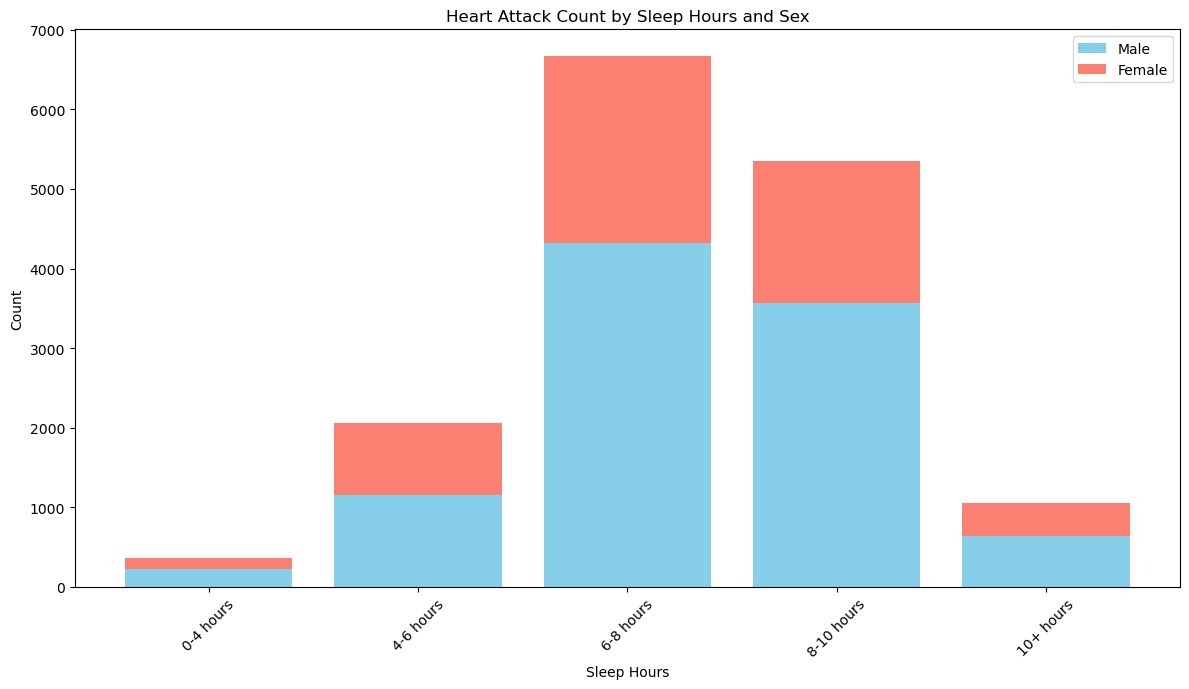

In [24]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Define bins for the SleepHours column
bins = [0, 4, 6, 8, 10, 24]  # Define bins for sleep hours (0-4, 4-6, 6-8, 8-10, 10+ hours)
labels = ['0-4 hours', '4-6 hours', '6-8 hours', '8-10 hours', '10+ hours']

# Create a new column for binned SleepHours
heart_attack_data['SleepHoursBinned'] = pd.cut(heart_attack_data['SleepHours'], bins=bins, labels=labels, right=False)

# Calculate the count of individuals who had a heart attack by SleepHoursBinned and Sex
heart_attack_count_by_sleep_sex = heart_attack_data.groupby(['SleepHoursBinned', 'Sex']).size().unstack(fill_value=0)

# Ensure the DataFrame has columns for both 'Male' and 'Female' to avoid issues in plotting
if 'Male' not in heart_attack_count_by_sleep_sex.columns:
    heart_attack_count_by_sleep_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_sleep_sex.columns:
    heart_attack_count_by_sleep_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(12, 7))

# Plot the stacked bars
plt.bar(heart_attack_count_by_sleep_sex.index, heart_attack_count_by_sleep_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_sleep_sex.index, heart_attack_count_by_sleep_sex['Female'], bottom=heart_attack_count_by_sleep_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Sleep Hours')
plt.ylabel('Count')
plt.title('Heart Attack Count by Sleep Hours and Sex')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  
plt.show()


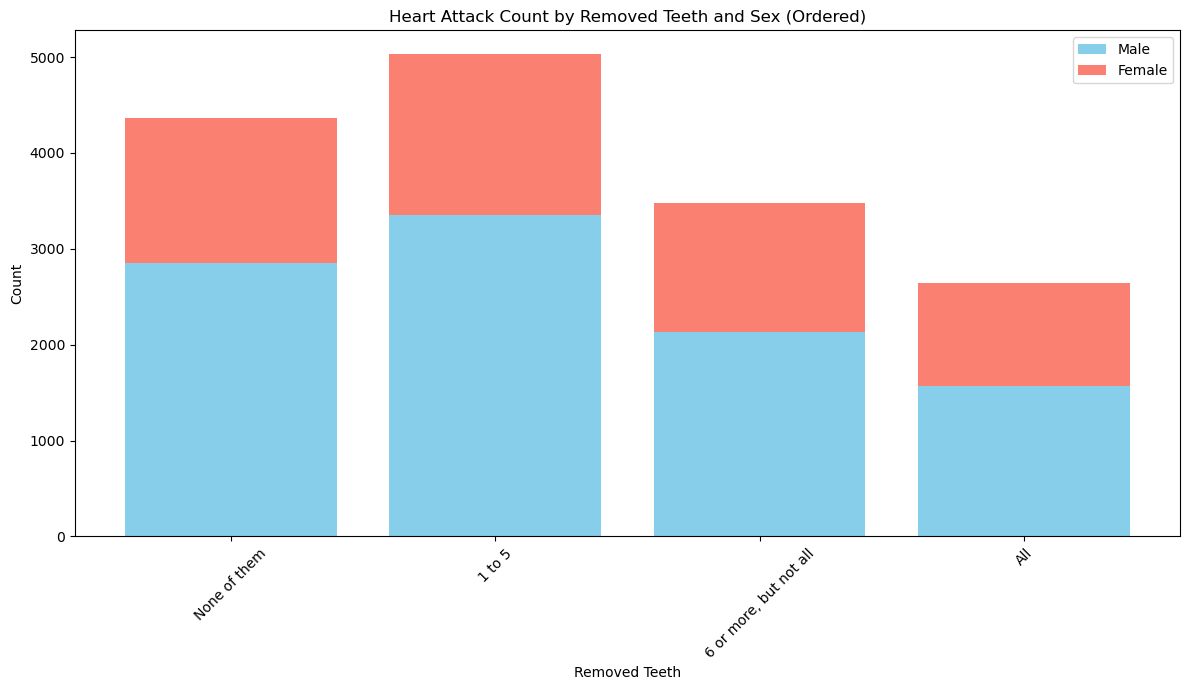

In [25]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Define the desired order of the RemovedTeeth categories
desired_order = ['None of them', '1 to 5', '6 or more, but not all', 'All']

# Convert 'RemovedTeeth' to a categorical type with the specified order
heart_attack_data['RemovedTeeth'] = pd.Categorical(
    heart_attack_data['RemovedTeeth'],
    categories=desired_order,
    ordered=True
)

# Calculate the count of individuals who had a heart attack by RemovedTeeth and Sex
heart_attack_count_by_teeth_sex = heart_attack_data.groupby(['RemovedTeeth', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_teeth_sex.columns:
    heart_attack_count_by_teeth_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_teeth_sex.columns:
    heart_attack_count_by_teeth_sex['Female'] = 0

# Sort the data by the total count of heart attack cases in each RemovedTeeth category
sorted_heart_attack_count_by_teeth_sex = heart_attack_count_by_teeth_sex.loc[desired_order]

# Plot the stacked bar chart
plt.figure(figsize=(12, 7))

# Plot the stacked bars
plt.bar(sorted_heart_attack_count_by_teeth_sex.index, sorted_heart_attack_count_by_teeth_sex['Male'], color='skyblue', label='Male')
plt.bar(sorted_heart_attack_count_by_teeth_sex.index, sorted_heart_attack_count_by_teeth_sex['Female'], bottom=sorted_heart_attack_count_by_teeth_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Removed Teeth')
plt.ylabel('Count')
plt.title('Heart Attack Count by Removed Teeth and Sex (Ordered)')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  
plt.show()


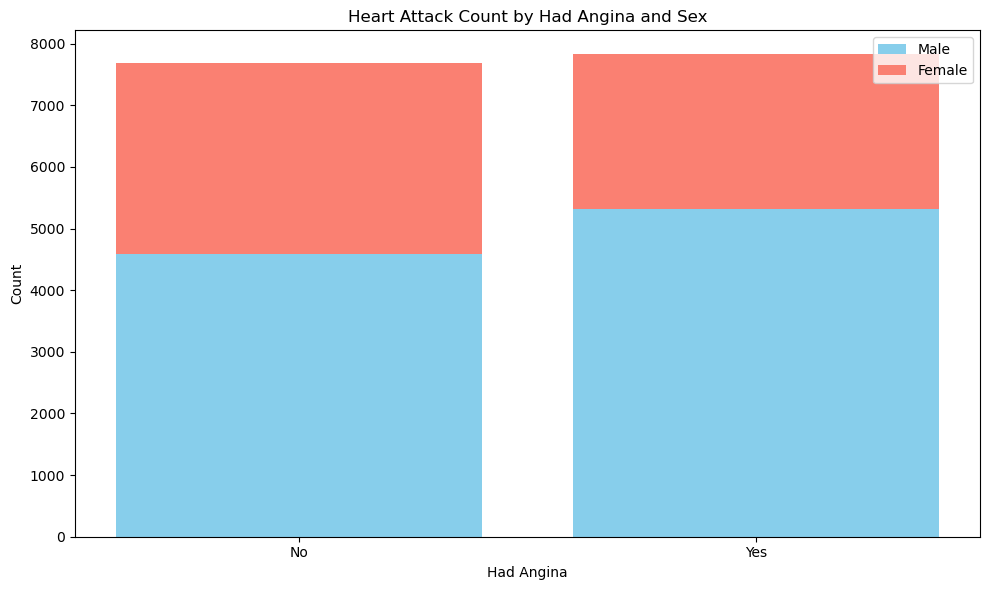

In [26]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by HadAngina and Sex
heart_attack_count_by_angina_sex = heart_attack_data.groupby(['HadAngina', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_angina_sex.columns:
    heart_attack_count_by_angina_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_angina_sex.columns:
    heart_attack_count_by_angina_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_angina_sex.index, heart_attack_count_by_angina_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_angina_sex.index, heart_attack_count_by_angina_sex['Female'], bottom=heart_attack_count_by_angina_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Had Angina')
plt.ylabel('Count')
plt.title('Heart Attack Count by Had Angina and Sex')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


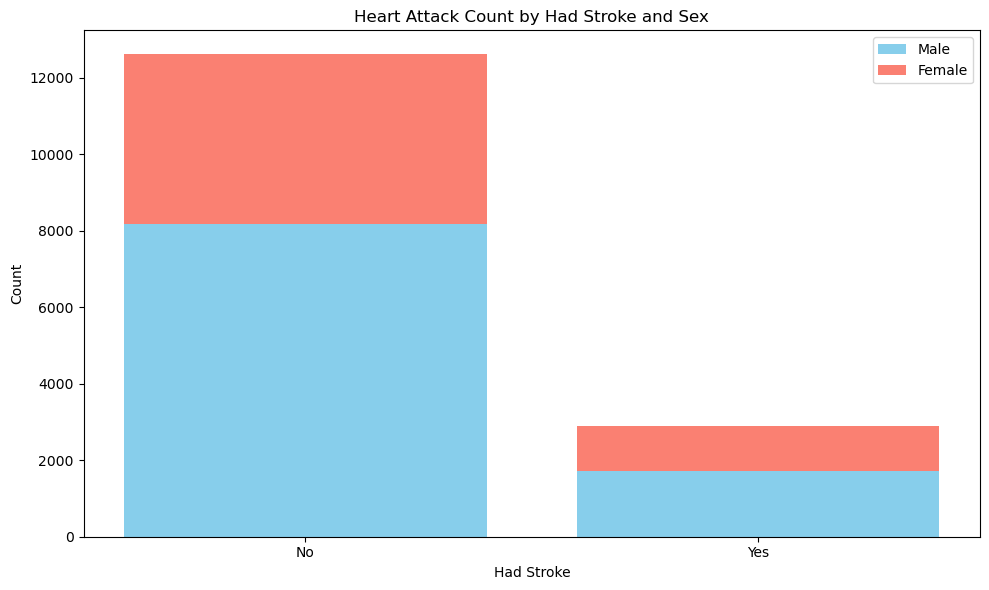

In [27]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by HadStroke and Sex
heart_attack_count_by_stroke_sex = heart_attack_data.groupby(['HadStroke', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_stroke_sex.columns:
    heart_attack_count_by_stroke_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_stroke_sex.columns:
    heart_attack_count_by_stroke_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_stroke_sex.index, heart_attack_count_by_stroke_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_stroke_sex.index, heart_attack_count_by_stroke_sex['Female'], bottom=heart_attack_count_by_stroke_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Had Stroke')
plt.ylabel('Count')
plt.title('Heart Attack Count by Had Stroke and Sex')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


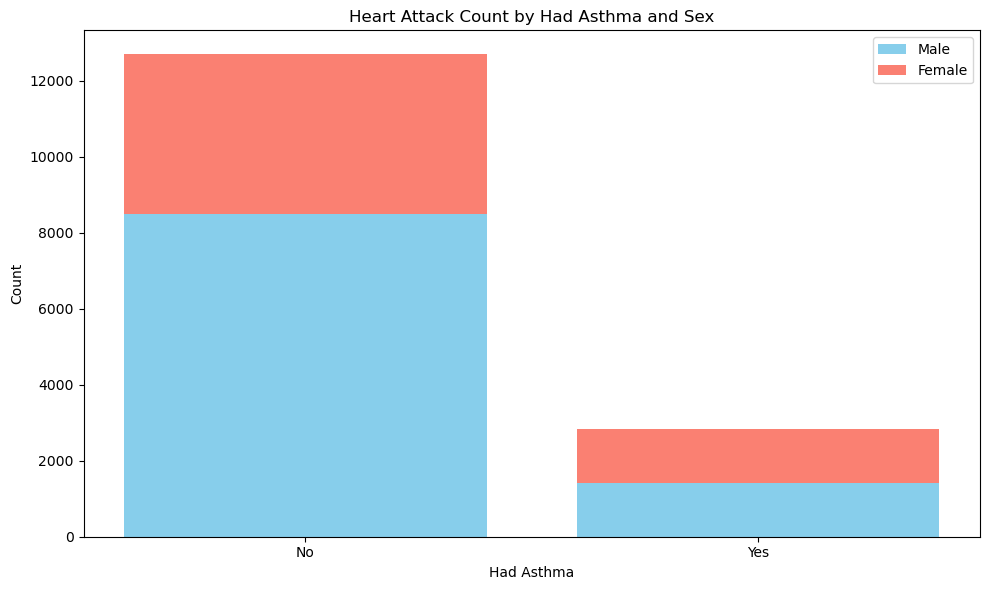

In [28]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by HadAsthma and Sex
heart_attack_count_by_asthma_sex = heart_attack_data.groupby(['HadAsthma', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_asthma_sex.columns:
    heart_attack_count_by_asthma_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_asthma_sex.columns:
    heart_attack_count_by_asthma_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_asthma_sex.index, heart_attack_count_by_asthma_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_asthma_sex.index, heart_attack_count_by_asthma_sex['Female'], bottom=heart_attack_count_by_asthma_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Had Asthma')
plt.ylabel('Count')
plt.title('Heart Attack Count by Had Asthma and Sex')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


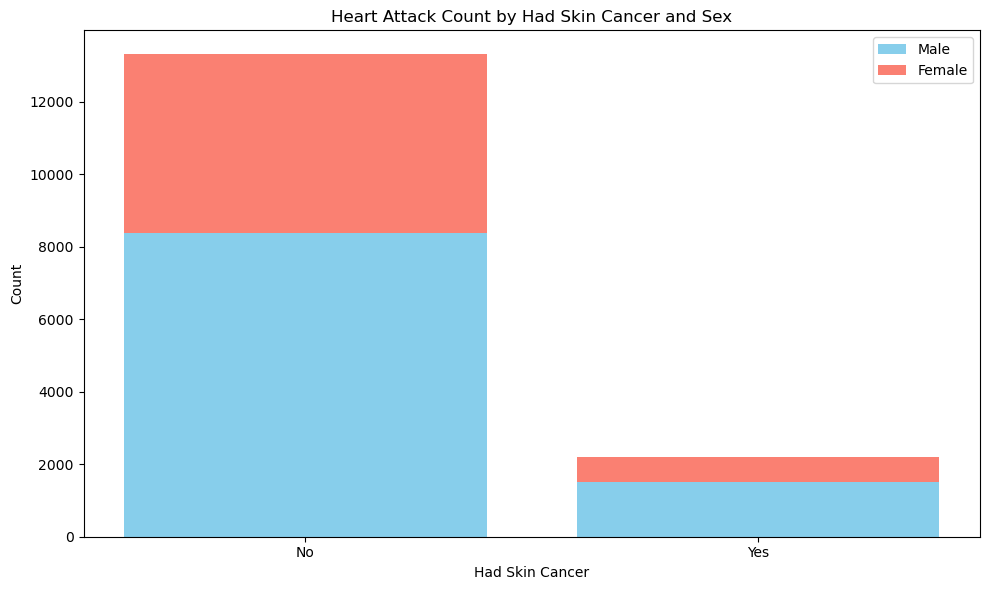

In [29]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by HadSkinCancer and Sex
heart_attack_count_by_cancer_sex = heart_attack_data.groupby(['HadSkinCancer', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_cancer_sex.columns:
    heart_attack_count_by_cancer_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_cancer_sex.columns:
    heart_attack_count_by_cancer_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_cancer_sex.index, heart_attack_count_by_cancer_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_cancer_sex.index, heart_attack_count_by_cancer_sex['Female'], bottom=heart_attack_count_by_cancer_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Had Skin Cancer')
plt.ylabel('Count')
plt.title('Heart Attack Count by Had Skin Cancer and Sex')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


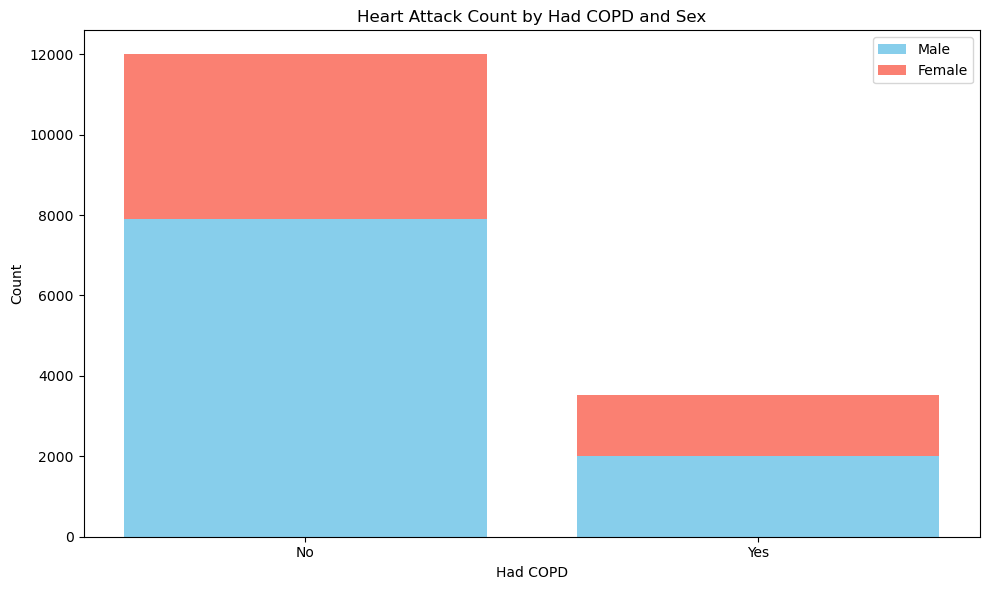

In [30]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by HadCOPD and Sex
heart_attack_count_by_copd_sex = heart_attack_data.groupby(['HadCOPD', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_copd_sex.columns:
    heart_attack_count_by_copd_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_copd_sex.columns:
    heart_attack_count_by_copd_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_copd_sex.index, heart_attack_count_by_copd_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_copd_sex.index, heart_attack_count_by_copd_sex['Female'], bottom=heart_attack_count_by_copd_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Had COPD')
plt.ylabel('Count')
plt.title('Heart Attack Count by Had COPD and Sex')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


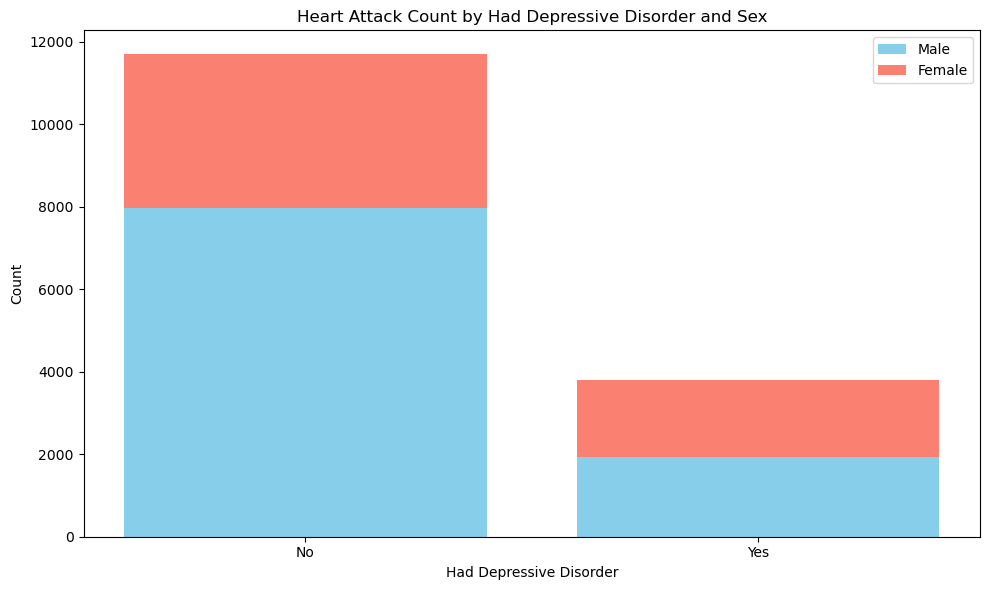

In [31]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by HadDepressiveDisorder and Sex
heart_attack_count_by_depression_sex = heart_attack_data.groupby(['HadDepressiveDisorder', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_depression_sex.columns:
    heart_attack_count_by_depression_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_depression_sex.columns:
    heart_attack_count_by_depression_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_depression_sex.index, heart_attack_count_by_depression_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_depression_sex.index, heart_attack_count_by_depression_sex['Female'], bottom=heart_attack_count_by_depression_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Had Depressive Disorder')
plt.ylabel('Count')
plt.title('Heart Attack Count by Had Depressive Disorder and Sex')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


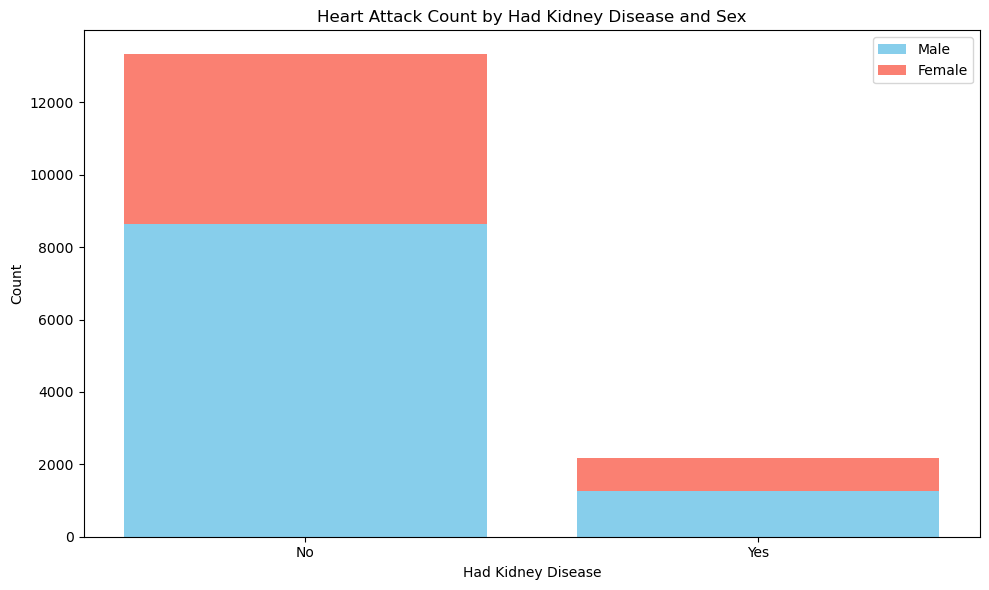

In [32]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by HadKidneyDisease and Sex
heart_attack_count_by_kidney_disease_sex = heart_attack_data.groupby(['HadKidneyDisease', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_kidney_disease_sex.columns:
    heart_attack_count_by_kidney_disease_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_kidney_disease_sex.columns:
    heart_attack_count_by_kidney_disease_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_kidney_disease_sex.index, heart_attack_count_by_kidney_disease_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_kidney_disease_sex.index, heart_attack_count_by_kidney_disease_sex['Female'], bottom=heart_attack_count_by_kidney_disease_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Had Kidney Disease')
plt.ylabel('Count')
plt.title('Heart Attack Count by Had Kidney Disease and Sex')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


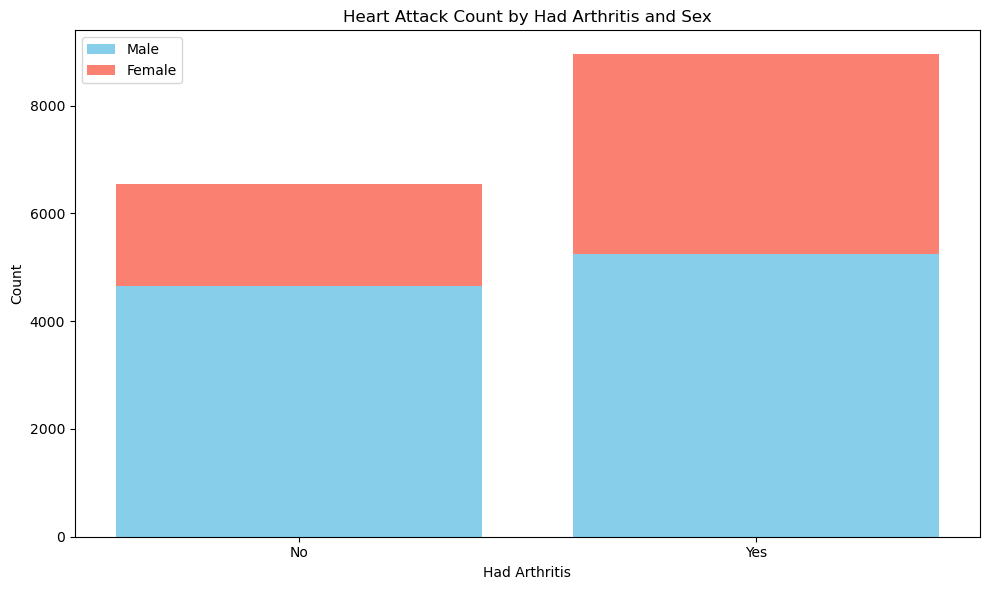

In [33]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by HadArthritis and Sex
heart_attack_count_by_arthritis_sex = heart_attack_data.groupby(['HadArthritis', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_arthritis_sex.columns:
    heart_attack_count_by_arthritis_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_arthritis_sex.columns:
    heart_attack_count_by_arthritis_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_arthritis_sex.index, heart_attack_count_by_arthritis_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_arthritis_sex.index, heart_attack_count_by_arthritis_sex['Female'], bottom=heart_attack_count_by_arthritis_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Had Arthritis')
plt.ylabel('Count')
plt.title('Heart Attack Count by Had Arthritis and Sex')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


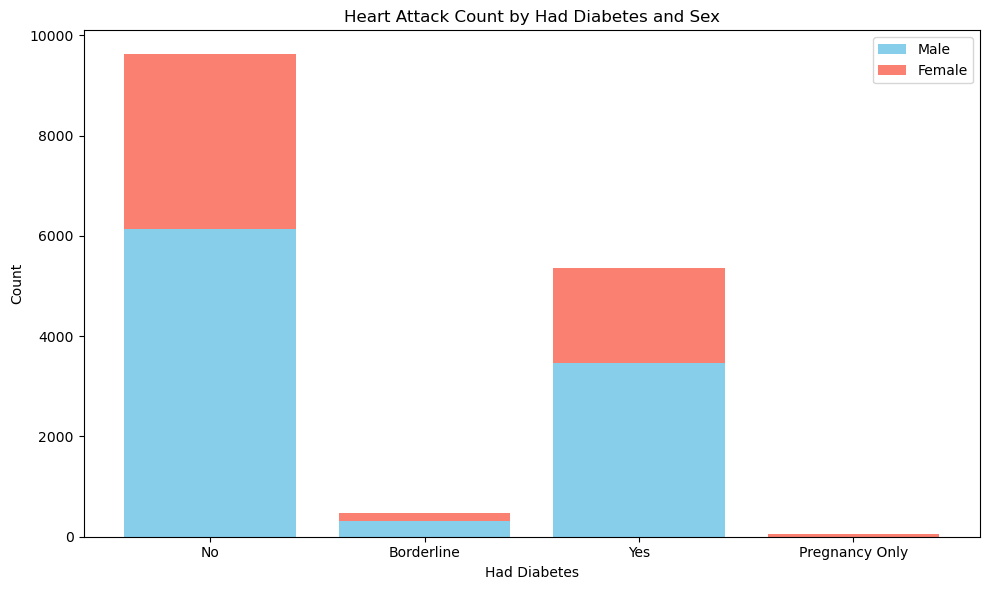

In [34]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by HadDiabetes and Sex
heart_attack_count_by_diabetes_sex = heart_attack_data.groupby(['HadDiabetes', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_diabetes_sex.columns:
    heart_attack_count_by_diabetes_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_diabetes_sex.columns:
    heart_attack_count_by_diabetes_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_diabetes_sex.index, heart_attack_count_by_diabetes_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_diabetes_sex.index, heart_attack_count_by_diabetes_sex['Female'], bottom=heart_attack_count_by_diabetes_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Had Diabetes')
plt.ylabel('Count')
plt.title('Heart Attack Count by Had Diabetes and Sex')
plt.legend()

# Customize x-axis labels
plt.xticks(heart_attack_count_by_diabetes_sex.index, ['No', 'Borderline', 'Yes', 'Pregnancy Only'])

# Show the plot
plt.tight_layout()
plt.show()


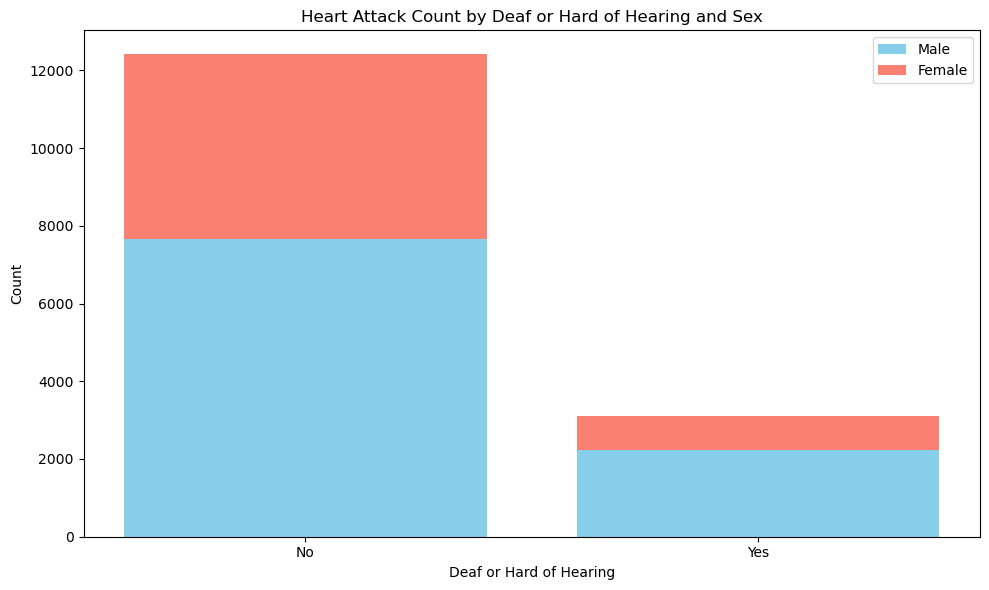

In [35]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by DeafOrHardOfHearing and Sex
heart_attack_count_by_hearing_sex = heart_attack_data.groupby(['DeafOrHardOfHearing', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_hearing_sex.columns:
    heart_attack_count_by_hearing_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_hearing_sex.columns:
    heart_attack_count_by_hearing_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_hearing_sex.index, heart_attack_count_by_hearing_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_hearing_sex.index, heart_attack_count_by_hearing_sex['Female'], bottom=heart_attack_count_by_hearing_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Deaf or Hard of Hearing')
plt.ylabel('Count')
plt.title('Heart Attack Count by Deaf or Hard of Hearing and Sex')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


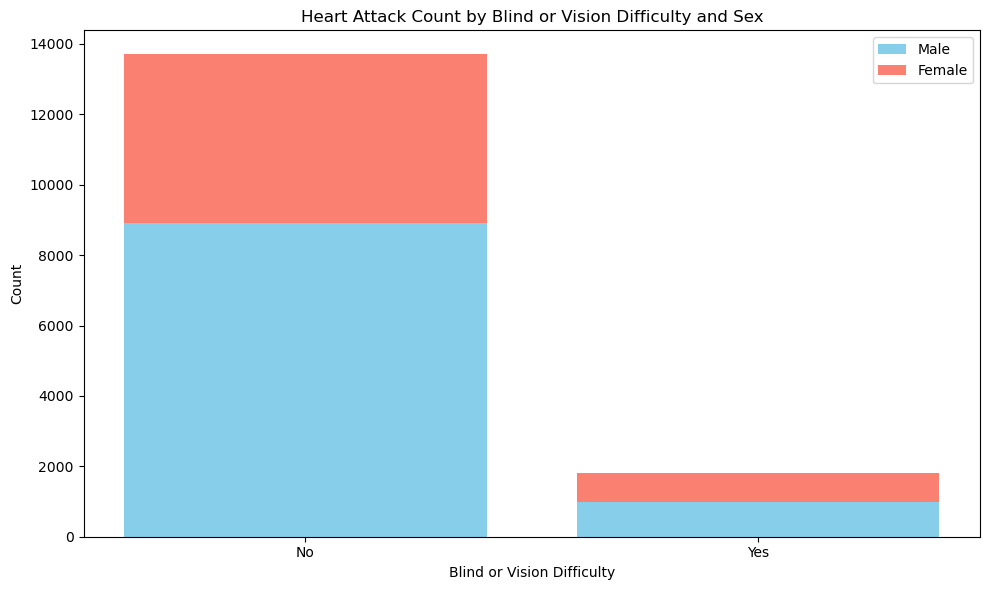

In [36]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by BlindOrVisionDifficulty and Sex
heart_attack_count_by_vision_sex = heart_attack_data.groupby(['BlindOrVisionDifficulty', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_vision_sex.columns:
    heart_attack_count_by_vision_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_vision_sex.columns:
    heart_attack_count_by_vision_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_vision_sex.index, heart_attack_count_by_vision_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_vision_sex.index, heart_attack_count_by_vision_sex['Female'], bottom=heart_attack_count_by_vision_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Blind or Vision Difficulty')
plt.ylabel('Count')
plt.title('Heart Attack Count by Blind or Vision Difficulty and Sex')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


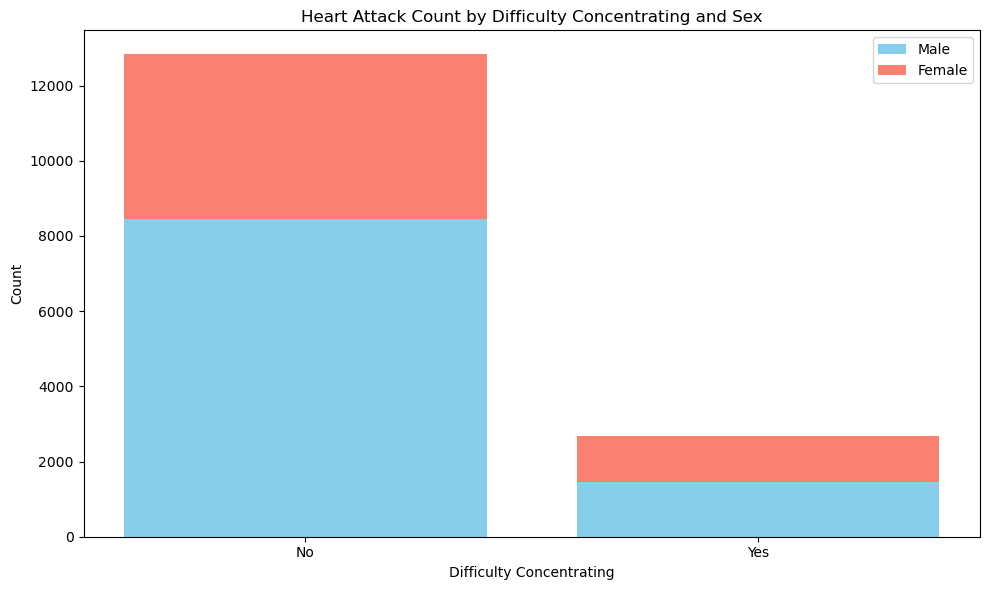

In [37]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by DifficultyConcentrating and Sex
heart_attack_count_by_concentration_sex = heart_attack_data.groupby(['DifficultyConcentrating', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_concentration_sex.columns:
    heart_attack_count_by_concentration_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_concentration_sex.columns:
    heart_attack_count_by_concentration_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_concentration_sex.index, heart_attack_count_by_concentration_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_concentration_sex.index, heart_attack_count_by_concentration_sex['Female'], bottom=heart_attack_count_by_concentration_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Difficulty Concentrating')
plt.ylabel('Count')
plt.title('Heart Attack Count by Difficulty Concentrating and Sex')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


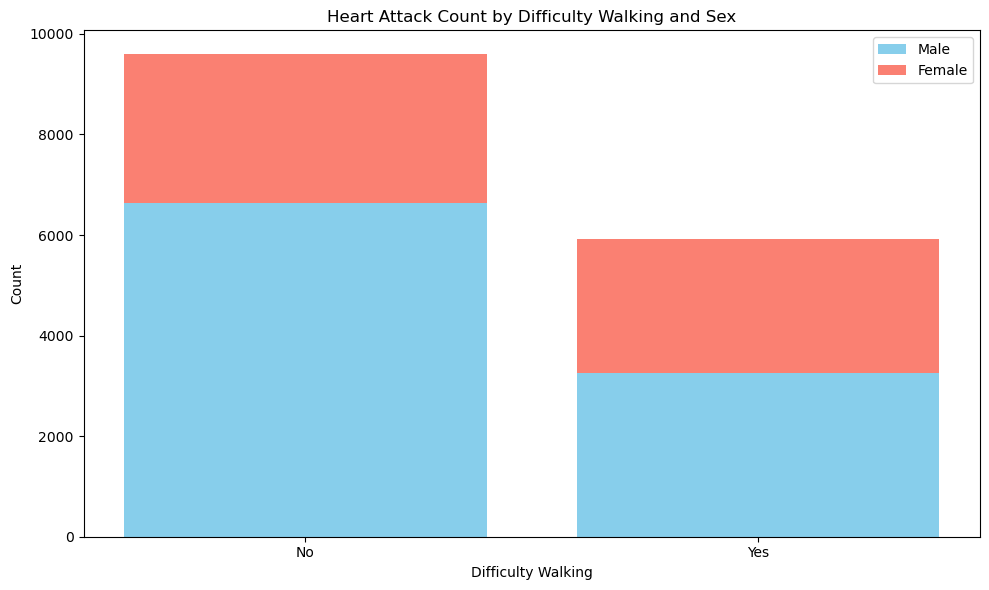

In [38]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by DifficultyWalking and Sex
heart_attack_count_by_walking_sex = heart_attack_data.groupby(['DifficultyWalking', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_walking_sex.columns:
    heart_attack_count_by_walking_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_walking_sex.columns:
    heart_attack_count_by_walking_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_walking_sex.index, heart_attack_count_by_walking_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_walking_sex.index, heart_attack_count_by_walking_sex['Female'], bottom=heart_attack_count_by_walking_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Difficulty Walking')
plt.ylabel('Count')
plt.title('Heart Attack Count by Difficulty Walking and Sex')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


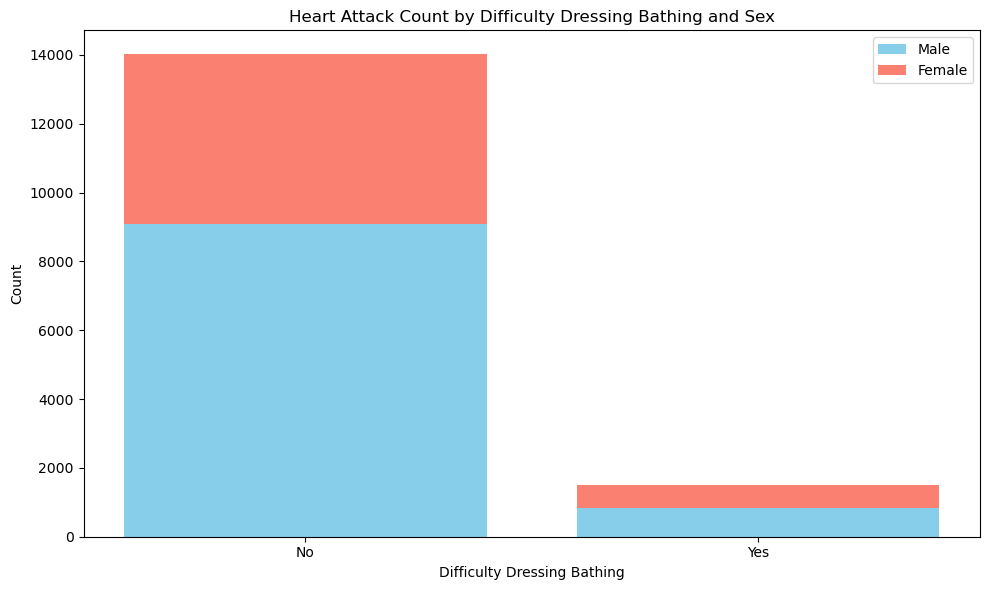

In [39]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by DifficultyDressingBathing and Sex
heart_attack_count_by_dressing_sex = heart_attack_data.groupby(['DifficultyDressingBathing', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_dressing_sex.columns:
    heart_attack_count_by_dressing_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_dressing_sex.columns:
    heart_attack_count_by_dressing_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_dressing_sex.index, heart_attack_count_by_dressing_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_dressing_sex.index, heart_attack_count_by_dressing_sex['Female'], bottom=heart_attack_count_by_dressing_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Difficulty Dressing Bathing')
plt.ylabel('Count')
plt.title('Heart Attack Count by Difficulty Dressing Bathing and Sex')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


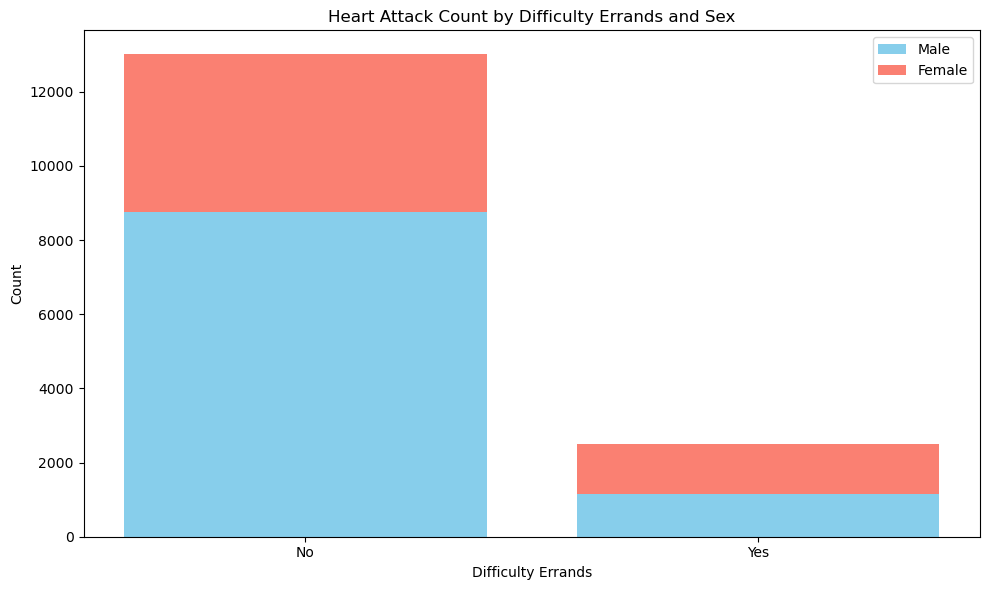

In [40]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by DifficultyErrands and Sex
heart_attack_count_by_errands_sex = heart_attack_data.groupby(['DifficultyErrands', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_errands_sex.columns:
    heart_attack_count_by_errands_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_errands_sex.columns:
    heart_attack_count_by_errands_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_errands_sex.index, heart_attack_count_by_errands_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_errands_sex.index, heart_attack_count_by_errands_sex['Female'], bottom=heart_attack_count_by_errands_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Difficulty Errands')
plt.ylabel('Count')
plt.title('Heart Attack Count by Difficulty Errands and Sex')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


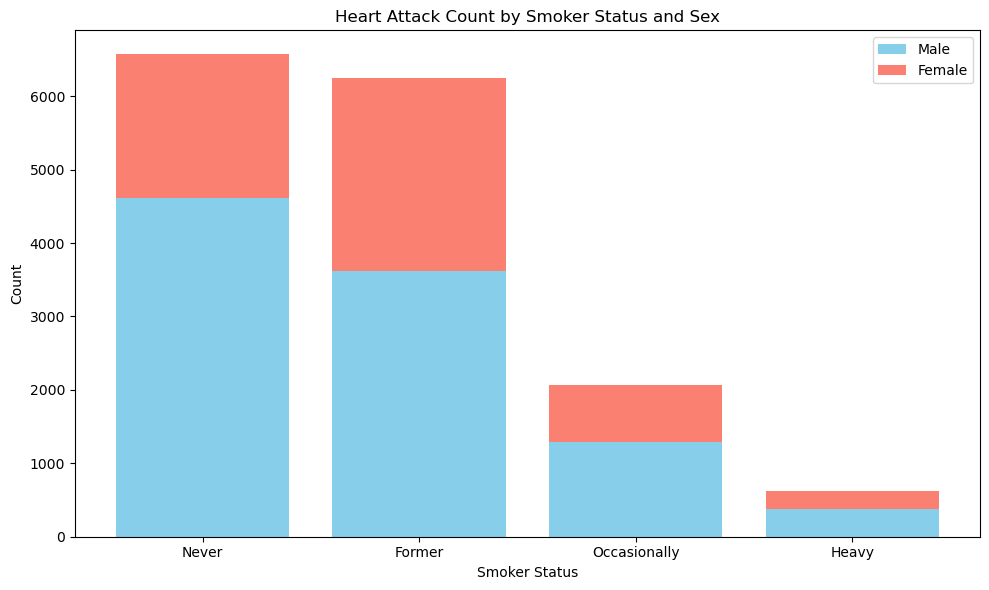

In [41]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Define the desired order of SmokerStatus categories
desired_order = ['Former smoker', 'Never smoked', 'Current smoker - now smokes every day', 'Current smoker - now smokes some days']

# Convert 'SmokerStatus' to a categorical type with the specified order
heart_attack_data['SmokerStatus'] = pd.Categorical(
    heart_attack_data['SmokerStatus'],
    categories=desired_order,
    ordered=True
)

# Calculate the count of individuals who had a heart attack by SmokerStatus and Sex
heart_attack_count_by_smoker_sex = heart_attack_data.groupby(['SmokerStatus', 'Sex']).size().unstack(fill_value=0)

# Reorder the rows of the DataFrame based on the new categorical order
heart_attack_count_by_smoker_sex = heart_attack_count_by_smoker_sex.reindex(desired_order)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_smoker_sex.columns:
    heart_attack_count_by_smoker_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_smoker_sex.columns:
    heart_attack_count_by_smoker_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_smoker_sex.index, heart_attack_count_by_smoker_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_smoker_sex.index, heart_attack_count_by_smoker_sex['Female'], bottom=heart_attack_count_by_smoker_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.title('Heart Attack Count by Smoker Status and Sex')

# Change the tick labels
plt.xticks(desired_order, ['Never', 'Former', 'Occasionally', 'Heavy'])

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()


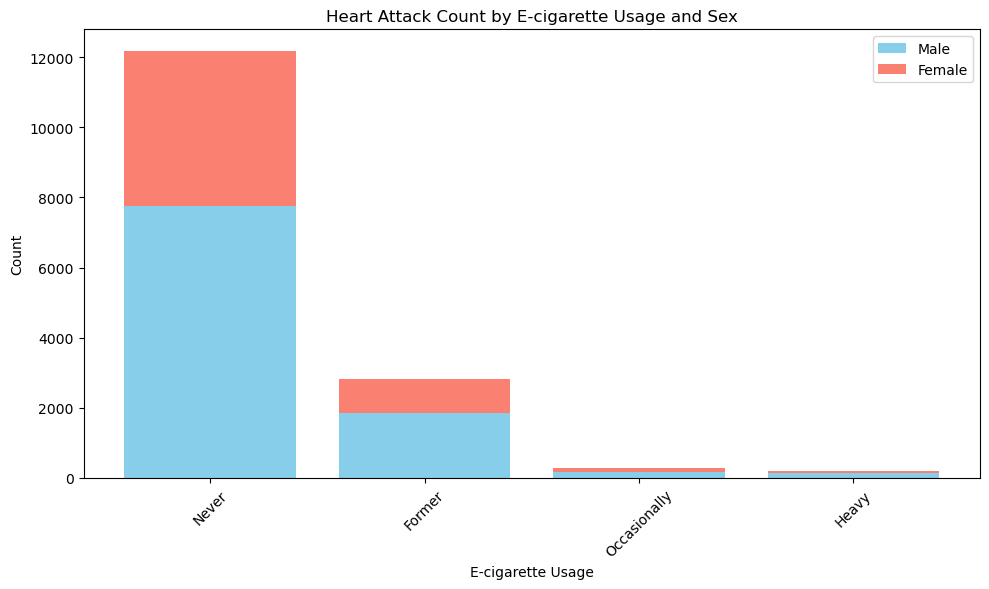

In [42]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Define the desired order of ECigaretteUsage categories
desired_order = [
    'Never used e-cigarettes in my entire life',
    'Not at all (right now)', 
    'Use them some days', 
    'Use them every day'
]

# Convert 'ECigaretteUsage' to a categorical type with the specified order
heart_attack_data['ECigaretteUsage'] = pd.Categorical(
    heart_attack_data['ECigaretteUsage'],
    categories=desired_order,
    ordered=True
)

# Calculate the count of individuals who had a heart attack by ECigaretteUsage and Sex
heart_attack_count_by_ecigarette_sex = heart_attack_data.groupby(['ECigaretteUsage', 'Sex']).size().unstack(fill_value=0)

# Reorder the rows of the DataFrame based on the new categorical order
heart_attack_count_by_ecigarette_sex = heart_attack_count_by_ecigarette_sex.reindex(desired_order)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_ecigarette_sex.columns:
    heart_attack_count_by_ecigarette_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_ecigarette_sex.columns:
    heart_attack_count_by_ecigarette_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_ecigarette_sex.index, heart_attack_count_by_ecigarette_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_ecigarette_sex.index, heart_attack_count_by_ecigarette_sex['Female'], bottom=heart_attack_count_by_ecigarette_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('E-cigarette Usage')
plt.ylabel('Count')
plt.title('Heart Attack Count by E-cigarette Usage and Sex')

# Change the tick labels to the desired simpler names and keep the desired order
plt.xticks(
    ticks=range(len(desired_order)), 
    labels=['Never', 'Former', 'Occasionally', 'Heavy'], 
    rotation=45
)

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()


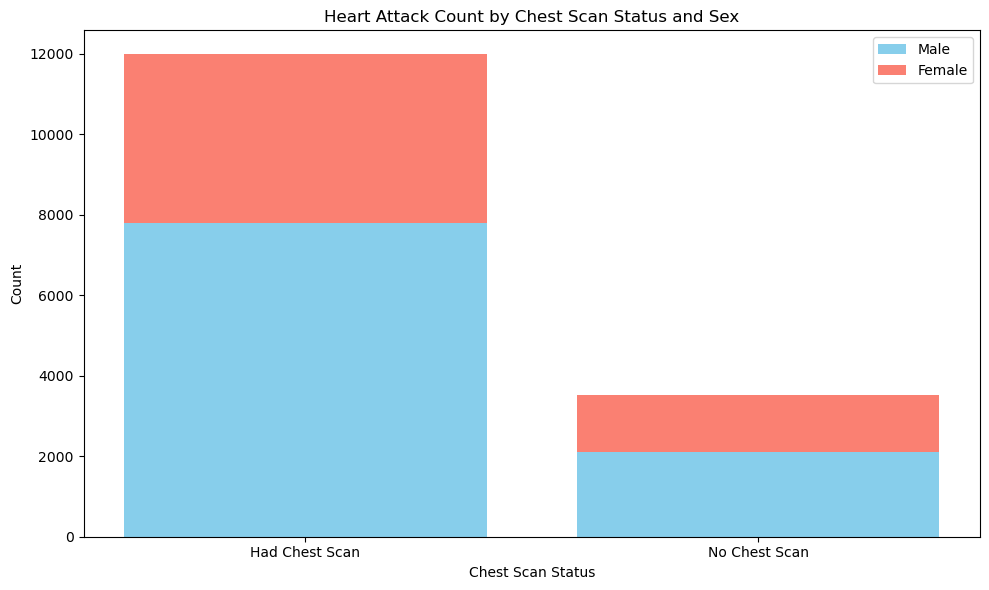

In [43]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Define the desired order and custom labels for ChestScan categories
desired_order = ['Yes', 'No']
custom_labels = ['Had Chest Scan', 'No Chest Scan']

# Convert 'ChestScan' to a categorical type with the specified order
heart_attack_data['ChestScan'] = pd.Categorical(
    heart_attack_data['ChestScan'],
    categories=desired_order,
    ordered=True
)

# Calculate the count of individuals who had a heart attack by ChestScan and Sex
heart_attack_count_by_chestscan_sex = heart_attack_data.groupby(['ChestScan', 'Sex']).size().unstack(fill_value=0)

# Reorder the rows of the DataFrame based on the new categorical order
heart_attack_count_by_chestscan_sex = heart_attack_count_by_chestscan_sex.reindex(desired_order)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_chestscan_sex.columns:
    heart_attack_count_by_chestscan_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_chestscan_sex.columns:
    heart_attack_count_by_chestscan_sex['Female'] = 0

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(heart_attack_count_by_chestscan_sex.index, heart_attack_count_by_chestscan_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_chestscan_sex.index, heart_attack_count_by_chestscan_sex['Female'], bottom=heart_attack_count_by_chestscan_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Chest Scan Status')
plt.ylabel('Count')
plt.title('Heart Attack Count by Chest Scan Status and Sex')

# Change the tick labels to the custom labels
plt.xticks(
    ticks=range(len(desired_order)), 
    labels=custom_labels, 
    rotation=0
)

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()


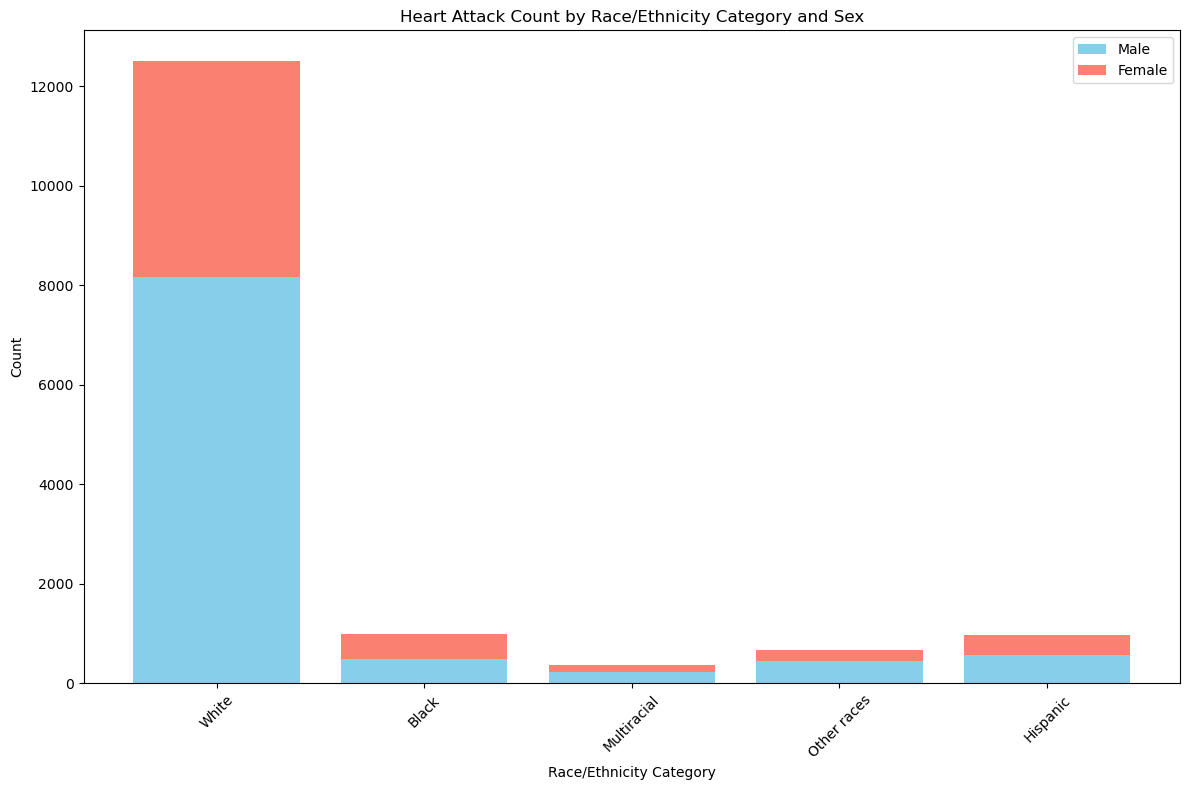

In [44]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Get the unique values of RaceEthnicityCategory for labeling and ordering
unique_race_ethnicity = heart_attack_data['RaceEthnicityCategory'].unique()

# Ensure there are no NaN values in the unique list (if they exist, remove them)
unique_race_ethnicity = [x for x in unique_race_ethnicity if pd.notna(x)]

# Convert 'RaceEthnicityCategory' to a categorical type with the specified order based on unique values
heart_attack_data['RaceEthnicityCategory'] = pd.Categorical(
    heart_attack_data['RaceEthnicityCategory'],
    categories=unique_race_ethnicity,
    ordered=True
)

# Calculate the count of individuals who had a heart attack by RaceEthnicityCategory and Sex
heart_attack_count_by_race_sex = heart_attack_data.groupby(['RaceEthnicityCategory', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_race_sex.columns:
    heart_attack_count_by_race_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_race_sex.columns:
    heart_attack_count_by_race_sex['Female'] = 0

# Reorder the rows of the DataFrame based on the categorical order (already aligned by step 3)
heart_attack_count_by_race_sex = heart_attack_count_by_race_sex.reindex(unique_race_ethnicity)

# Provided tick labels (assuming these match the order in your data)
tick_labels = ['White', 'Black', 'Multiracial', 'Other races', 'Hispanic']

# Check if the number of unique values matches the provided tick labels length
if len(unique_race_ethnicity) != len(tick_labels):
    raise ValueError("The number of unique values in 'RaceEthnicityCategory' does not match the number of provided tick labels.")

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))

# Plot the stacked bars
plt.bar(heart_attack_count_by_race_sex.index, heart_attack_count_by_race_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_race_sex.index, heart_attack_count_by_race_sex['Female'], bottom=heart_attack_count_by_race_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Race/Ethnicity Category')
plt.ylabel('Count')
plt.title('Heart Attack Count by Race/Ethnicity Category and Sex')

# Automatically use the provided tick labels
plt.xticks(ticks=unique_race_ethnicity, labels=tick_labels, rotation=45)

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()


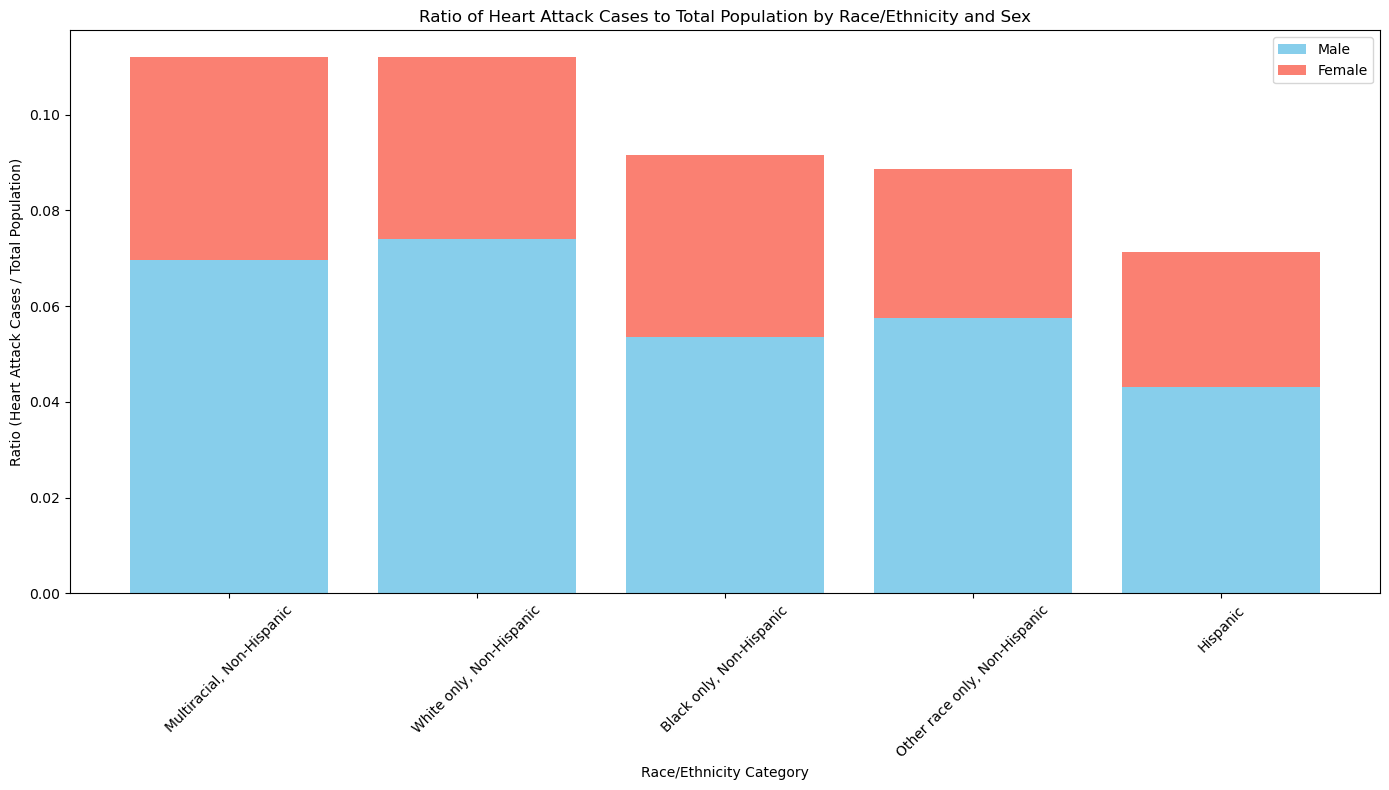

In [45]:
# Calculate the total count of individuals by Race/Ethnicity and Sex
total_count_by_race_sex = data.groupby(['RaceEthnicityCategory', 'Sex']).size().unstack(fill_value=0)

# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by Race/Ethnicity and Sex
heart_attack_count_by_race_sex = heart_attack_data.groupby(['RaceEthnicityCategory', 'Sex']).size().unstack(fill_value=0)

# Calculate the ratio of heart attacks to the total count for each Race/Ethnicity and Sex
ratio_heart_attack_by_race_sex = heart_attack_count_by_race_sex / total_count_by_race_sex

# Combine the male and female ratios for ordering
ratio_combined = ratio_heart_attack_by_race_sex.sum(axis=1)

# Order the categories by the combined ratio
ordered_categories = ratio_combined.sort_values(ascending=False).index

# Reorder the ratio data for plotting
ratio_heart_attack_by_race_sex = ratio_heart_attack_by_race_sex.loc[ordered_categories]

# Plot the ratios as a stacked bar chart
plt.figure(figsize=(14, 8))

# Plot the stacked bars
plt.bar(ratio_heart_attack_by_race_sex.index, ratio_heart_attack_by_race_sex['Male'], color='skyblue', label='Male')
plt.bar(ratio_heart_attack_by_race_sex.index, ratio_heart_attack_by_race_sex['Female'], bottom=ratio_heart_attack_by_race_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Race/Ethnicity Category')
plt.ylabel('Ratio (Heart Attack Cases / Total Population)')
plt.title('Ratio of Heart Attack Cases to Total Population by Race/Ethnicity and Sex')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


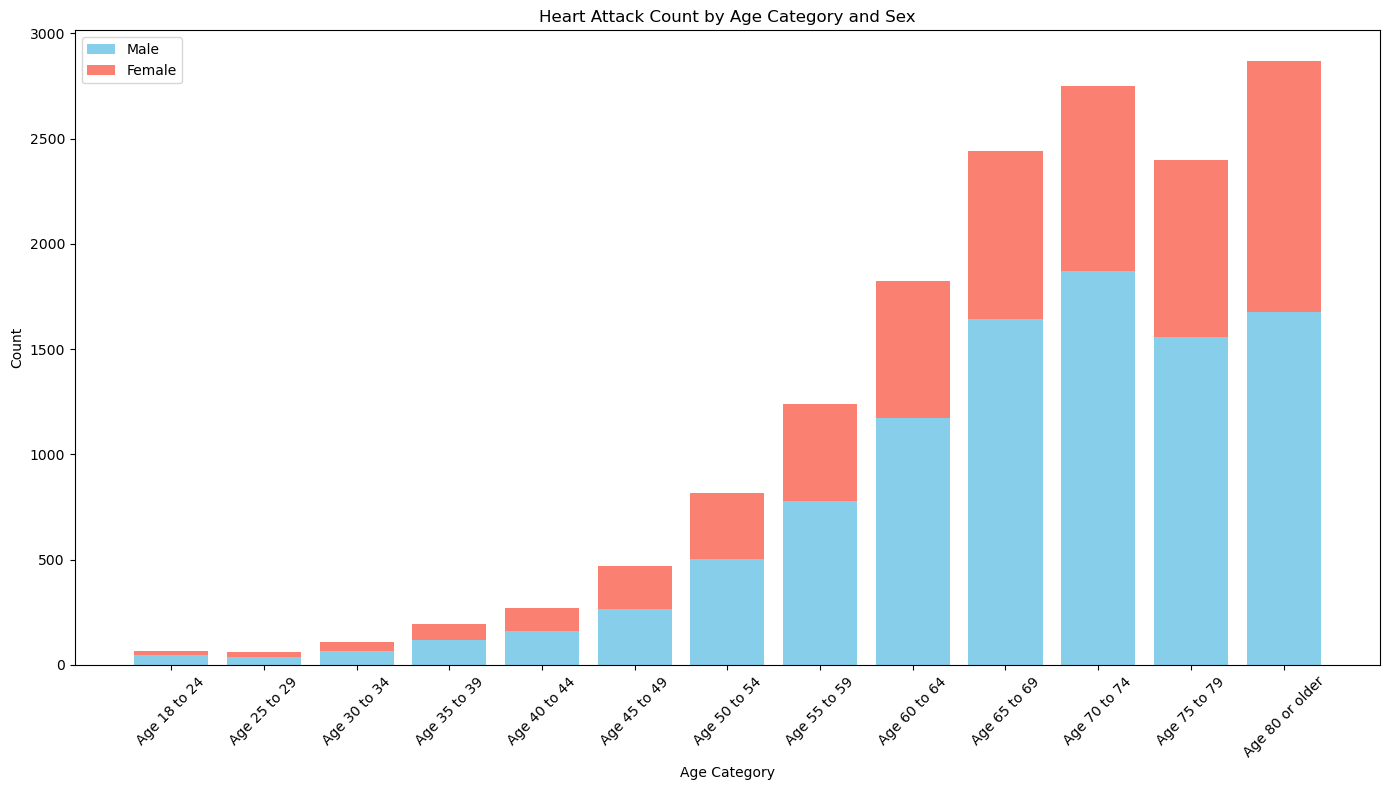

In [46]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Get the unique values of AgeCategory for ordering
unique_age_categories = sorted(heart_attack_data['AgeCategory'].unique())

# Convert 'AgeCategory' to a categorical type with the specified order based on unique values
heart_attack_data['AgeCategory'] = pd.Categorical(
    heart_attack_data['AgeCategory'],
    categories=unique_age_categories,
    ordered=True
)

# Calculate the count of individuals who had a heart attack by AgeCategory and Sex
heart_attack_count_by_age_sex = heart_attack_data.groupby(['AgeCategory', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_age_sex.columns:
    heart_attack_count_by_age_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_age_sex.columns:
    heart_attack_count_by_age_sex['Female'] = 0

# Reorder the rows of the DataFrame based on the categorical order
heart_attack_count_by_age_sex = heart_attack_count_by_age_sex.reindex(unique_age_categories)

# Plot the stacked bar chart
plt.figure(figsize=(14, 8))

# Plot the stacked bars
plt.bar(heart_attack_count_by_age_sex.index, heart_attack_count_by_age_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_age_sex.index, heart_attack_count_by_age_sex['Female'], bottom=heart_attack_count_by_age_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Heart Attack Count by Age Category and Sex')

# Automatically use the unique values of AgeCategory as tick labels
plt.xticks(rotation=45)

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()


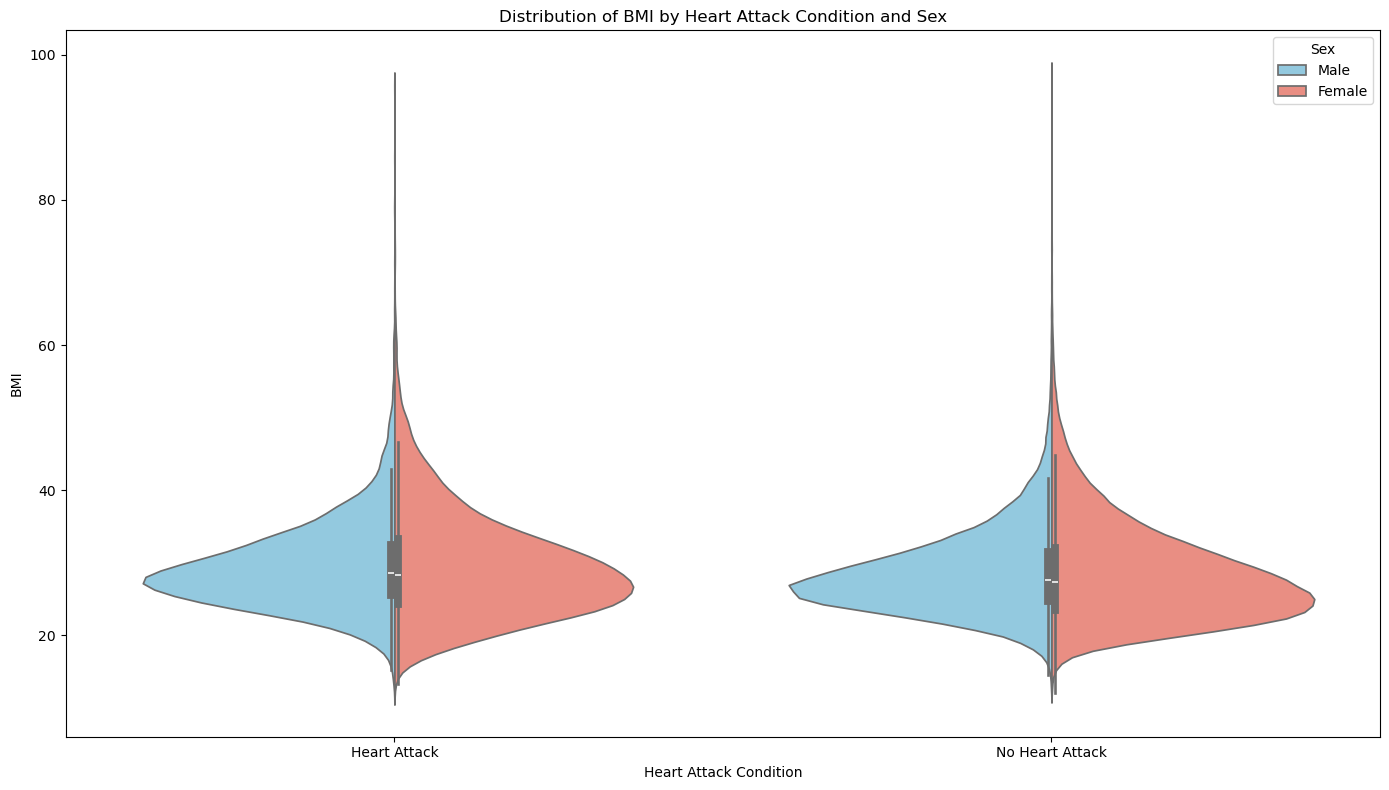

In [47]:
# Filtering data for males and females to be used in the violin plots
male_data = data[data['Sex'] == 'Male']
female_data = data[data['Sex'] == 'Female']

# Filter data for individuals with heart attack
heart_attack_male_data = male_data[male_data['HadHeartAttack'] == 'Yes']
heart_attack_female_data = female_data[female_data['HadHeartAttack'] == 'Yes']

# Filter data for individuals without heart attack
no_heart_attack_male_data = male_data[male_data['HadHeartAttack'] == 'No']
no_heart_attack_female_data = female_data[female_data['HadHeartAttack'] == 'No']

# Combine data into one DataFrame with an additional 'Sex' column
heart_attack_combined_data = pd.concat([heart_attack_male_data[['BMI']], heart_attack_female_data[['BMI']]], axis=0)
heart_attack_combined_data['Condition'] = 'Heart Attack'
heart_attack_combined_data['Sex'] = ['Male'] * len(heart_attack_male_data) + ['Female'] * len(heart_attack_female_data)

no_heart_attack_combined_data = pd.concat([no_heart_attack_male_data[['BMI']], no_heart_attack_female_data[['BMI']]], axis=0)
no_heart_attack_combined_data['Condition'] = 'No Heart Attack'
no_heart_attack_combined_data['Sex'] = ['Male'] * len(no_heart_attack_male_data) + ['Female'] * len(no_heart_attack_female_data)

# Combine both heart attack and no heart attack data
combined_data = pd.concat([heart_attack_combined_data, no_heart_attack_combined_data], axis=0)

# Define the figure size
plt.figure(figsize=(14, 8))

# Create violin plots for heart attack cases
sns.violinplot(x='Condition', y='BMI', hue='Sex', data=combined_data, palette={'Male': 'skyblue', 'Female': 'salmon'}, split=True)

# Add labels and title
plt.xlabel('Heart Attack Condition')
plt.ylabel('BMI')
plt.title('Distribution of BMI by Heart Attack Condition and Sex')

# Show the plot
plt.tight_layout()
plt.show()


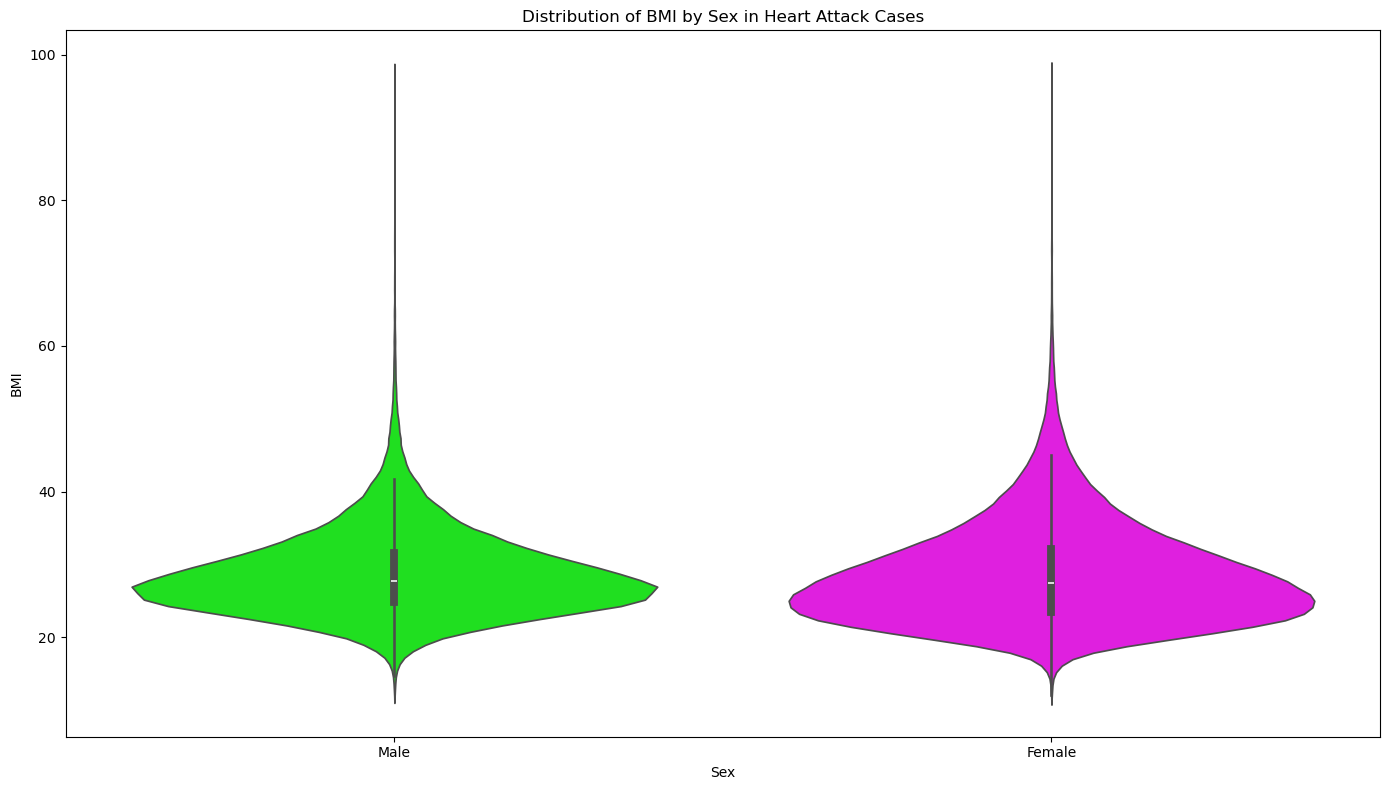

In [48]:
# Combine data into one DataFrame with an additional 'Sex' column
combined_data = pd.concat([male_data[['BMI']], female_data[['BMI']]], axis=0)
combined_data['Sex'] = ['Male'] * len(male_data) + ['Female'] * len(female_data)

# Define the figure size
plt.figure(figsize=(14, 8))

# Create a violin plot
sns.violinplot(x='Sex', y='BMI', data=combined_data, palette={'Male': 'lime', 'Female': 'fuchsia'})

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.title('Distribution of BMI by Sex in Heart Attack Cases')

# Show the plot
plt.tight_layout()
plt.show()


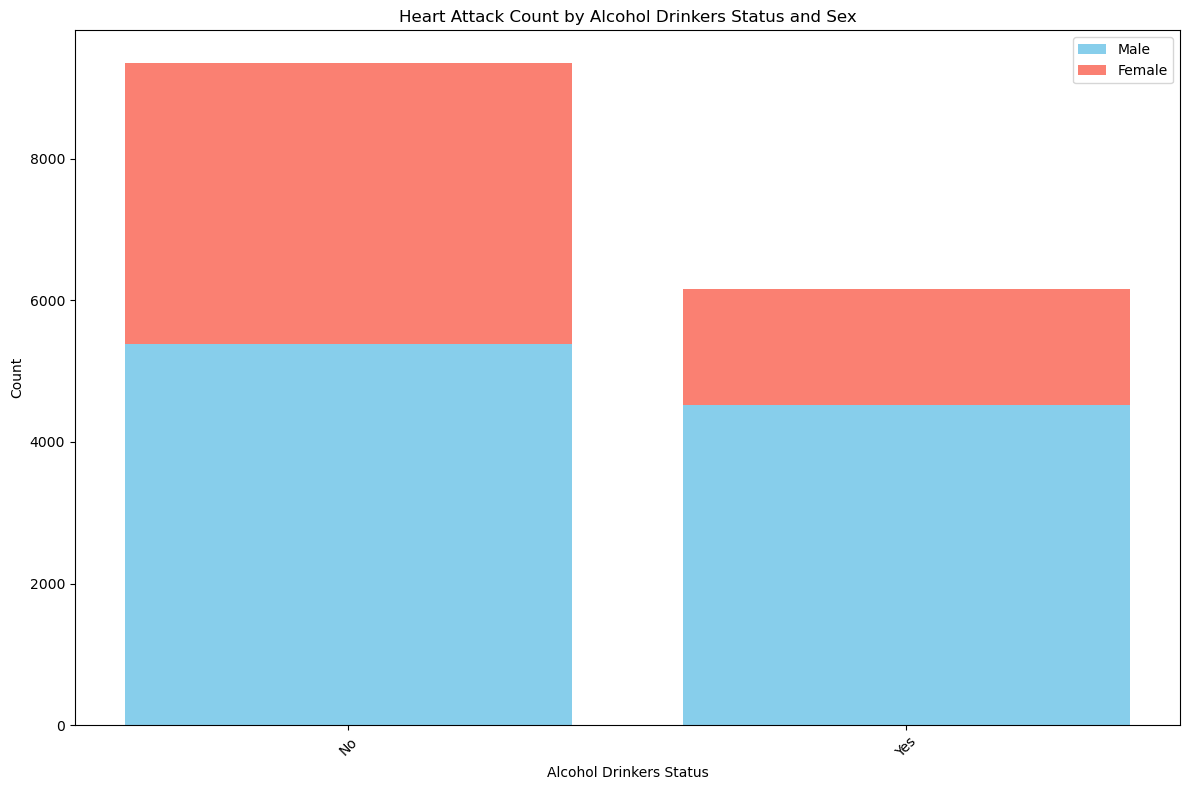

In [49]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by AlcoholDrinkers and Sex
heart_attack_count_by_alcohol_sex = heart_attack_data.groupby(['AlcoholDrinkers', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_alcohol_sex.columns:
    heart_attack_count_by_alcohol_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_alcohol_sex.columns:
    heart_attack_count_by_alcohol_sex['Female'] = 0

# Define the figure size
plt.figure(figsize=(12, 8))

# Plot the stacked bar chart
plt.bar(heart_attack_count_by_alcohol_sex.index, heart_attack_count_by_alcohol_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_alcohol_sex.index, heart_attack_count_by_alcohol_sex['Female'], bottom=heart_attack_count_by_alcohol_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Alcohol Drinkers Status')
plt.ylabel('Count')
plt.title('Heart Attack Count by Alcohol Drinkers Status and Sex')

# Automatically use the unique values of AlcoholDrinkers as tick labels
plt.xticks(rotation=45)  

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


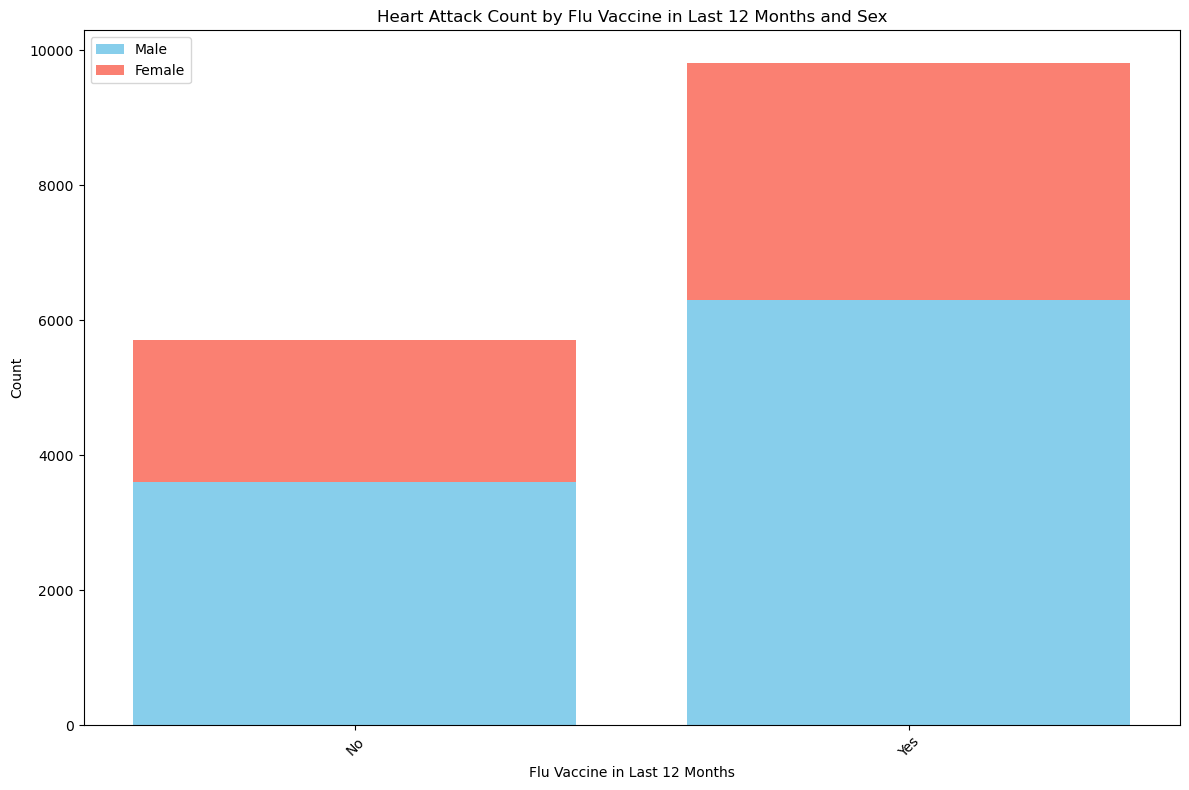

In [50]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by FluVaxLast12 and Sex
heart_attack_count_by_flu_sex = heart_attack_data.groupby(['FluVaxLast12', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_flu_sex.columns:
    heart_attack_count_by_flu_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_flu_sex.columns:
    heart_attack_count_by_flu_sex['Female'] = 0

# Define the figure size
plt.figure(figsize=(12, 8))

# Plot the stacked bar chart
plt.bar(heart_attack_count_by_flu_sex.index, heart_attack_count_by_flu_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_flu_sex.index, heart_attack_count_by_flu_sex['Female'], bottom=heart_attack_count_by_flu_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Flu Vaccine in Last 12 Months')
plt.ylabel('Count')
plt.title('Heart Attack Count by Flu Vaccine in Last 12 Months and Sex')

# Automatically use the unique values of FluVaxLast12 as tick labels
plt.xticks(rotation=45)  

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


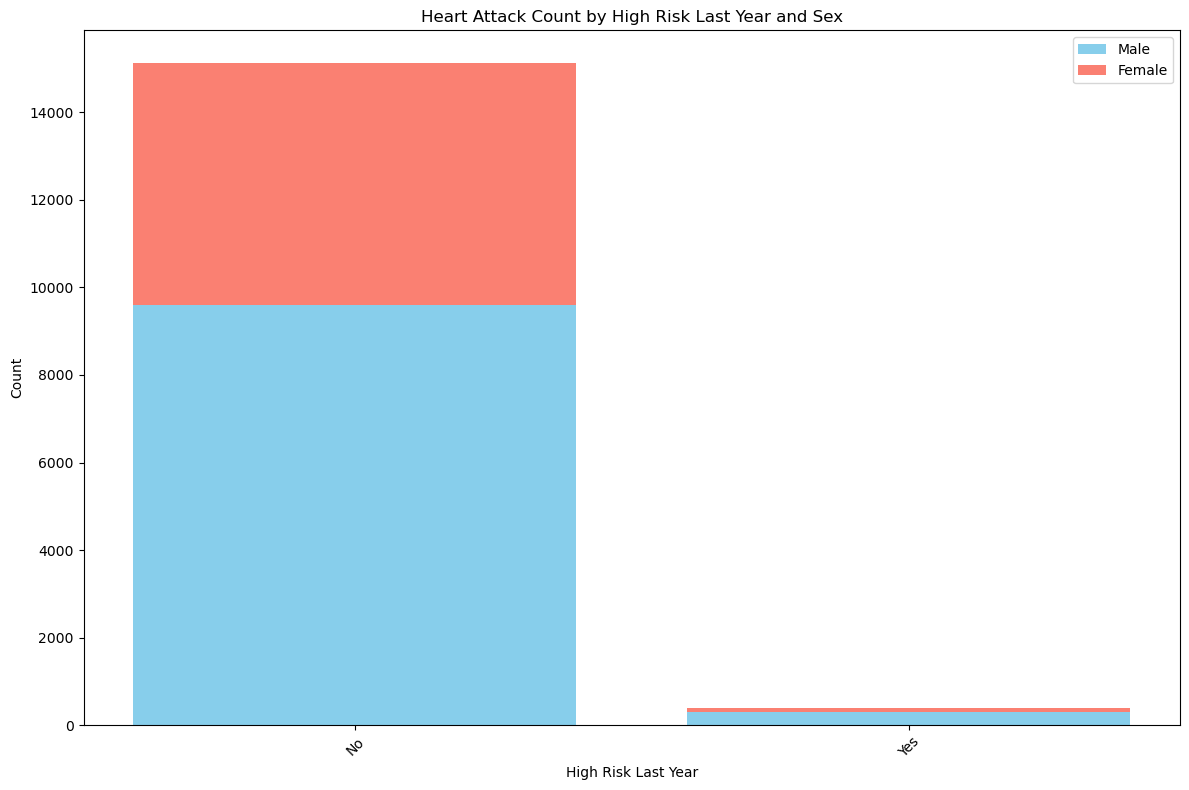

In [51]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by HighRiskLastYear and Sex
heart_attack_count_by_risk_sex = heart_attack_data.groupby(['HighRiskLastYear', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_risk_sex.columns:
    heart_attack_count_by_risk_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_risk_sex.columns:
    heart_attack_count_by_risk_sex['Female'] = 0

# Define the figure size
plt.figure(figsize=(12, 8))

# Plot the stacked bar chart
plt.bar(heart_attack_count_by_risk_sex.index, heart_attack_count_by_risk_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_risk_sex.index, heart_attack_count_by_risk_sex['Female'], bottom=heart_attack_count_by_risk_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('High Risk Last Year')
plt.ylabel('Count')
plt.title('Heart Attack Count by High Risk Last Year and Sex')

# Automatically use the unique values of HighRiskLastYear as tick labels
plt.xticks(rotation=45)  

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


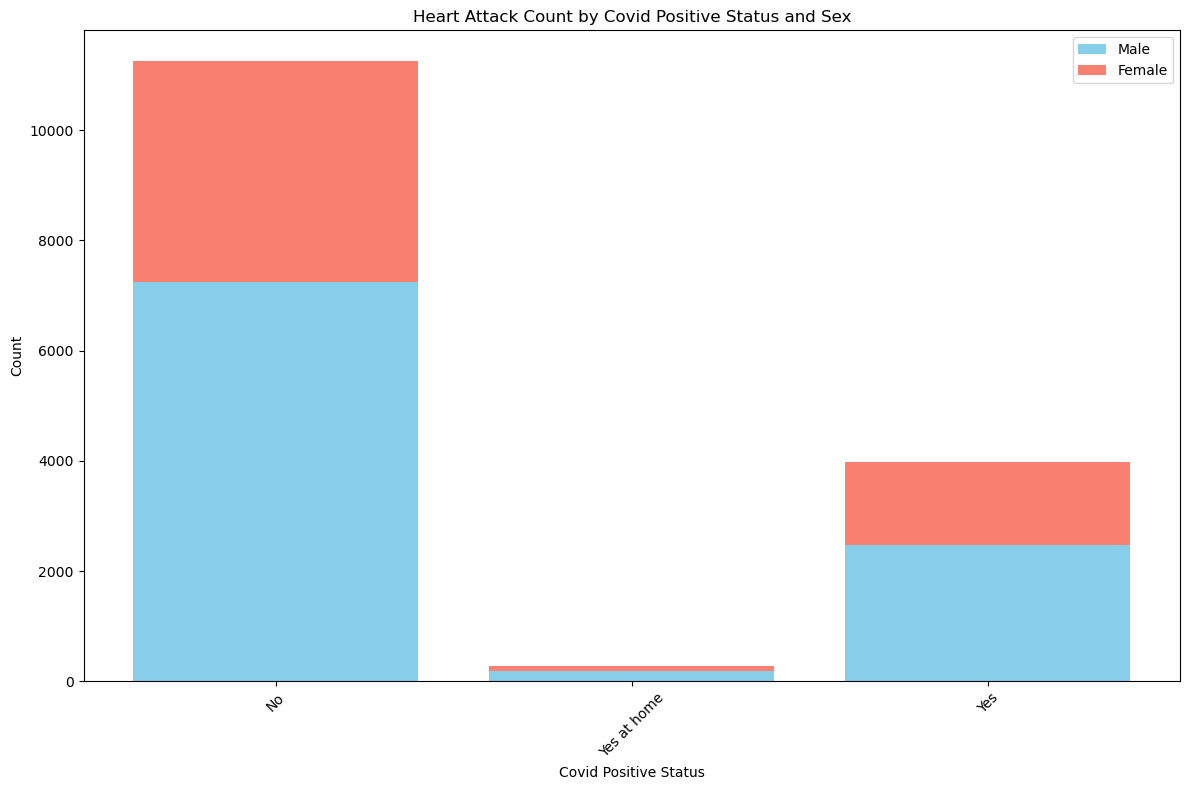

In [52]:
# Filter the data to include only those who had a heart attack
heart_attack_data = data[data['HadHeartAttack'] == 'Yes']

# Calculate the count of individuals who had a heart attack by CovidPos and Sex
heart_attack_count_by_covid_sex = heart_attack_data.groupby(['CovidPos', 'Sex']).size().unstack(fill_value=0)

# Add columns with zero counts if they are missing
if 'Male' not in heart_attack_count_by_covid_sex.columns:
    heart_attack_count_by_covid_sex['Male'] = 0
if 'Female' not in heart_attack_count_by_covid_sex.columns:
    heart_attack_count_by_covid_sex['Female'] = 0

# Define the figure size
plt.figure(figsize=(12, 8))

# Plot the stacked bar chart
plt.bar(heart_attack_count_by_covid_sex.index, heart_attack_count_by_covid_sex['Male'], color='skyblue', label='Male')
plt.bar(heart_attack_count_by_covid_sex.index, heart_attack_count_by_covid_sex['Female'], bottom=heart_attack_count_by_covid_sex['Male'], color='salmon', label='Female')

# Add labels and title
plt.xlabel('Covid Positive Status')
plt.ylabel('Count')
plt.title('Heart Attack Count by Covid Positive Status and Sex')

# Automatically use the unique values of CovidPos as tick labels
tick_labels = ['No', 'Yes at home', 'Yes']
plt.xticks(heart_attack_count_by_covid_sex.index, tick_labels, rotation=45)  

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
